In [2]:
import xml.etree.ElementTree as ET
import os
from pattern.nl import sentiment
import re
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from pattern.nl import pluralize
from IPython.display import display_html
import seaborn as sns
nltk.download('wordnet')
nltk.download('omw')
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from datetime import date
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim import models
from pattern.nl import pluralize
import string
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\savin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\savin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\savin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dutch Political Parties in the House of Representatives 

# LSDP - Group 5

3. [RQ1](#RQ1) is done by Quinten Bolding (11290889)
4. [RQ2](#RQ2) is done by Marten Rozema (11735651)
5. [RQ3](#RQ3) is done by Savina van Rielova (12154520)
6. [RQ4](#RQ4) is done by Julotte van der Beek (11338326)

### Table of Contents

* [1. Introduction](#Introduction)
    * [1.1. Research Questions](#RQs)
* [2. Dataset](#Dataset)
    * [2.1. Preprocessing](#Preprocessing)
* [3. RQ1: Differences in political ideology based on sentiment analysis](#RQ1)
    * [3.1. Introduction research question](#sectionX_1)
        * [3.1.1. Motivation](#sectionX_1_1)
        * [3.1.2. Related literature](#sectionX_1_2)
    * [3.2. Experimental setup](#sectionX_2)
        * [3.2.1. Approach](#sectionX_2_2)
        * [3.2.2. Implementation](#sectionX_2_3)
    * [3.3. Evaluation](#sectionX_3)
        * [3.3.1. Metrics](#sectionX_3_1)
        * [3.3.2. Results](#sectionX_3_2)
    * [3.4. Findings](#sectionX_4)
        * [3.4.1. First illustration](#sectionX_4_1)
        * [3.4.2. First Interpretation](#sectionX_4_2)
        * [3.4.3. Second illustration](#sectionX_4_3)
        * [3.4.4. Second Interpretation](#sectionX_4_4)
        * [3.4.5. Discussion](#sectionX_4_5)
    * [3.5. Conclusions](#sectionX_5)
        * [3.5.1. Summary](#sectionX_5_1)
        * [3.5.2. Directions future work](#sectionX_5_2)
        * [3.5.3. Lessons learned](#sectionX_5_3)
* [4. RQ2: Sentiment between parties before and during covid-19](#RQ2)
    * [4.1. Introduction research question](#section4_1)
        * [4.1.1. Motivation](#section4_1_1)
        * [4.1.2. Related literature](#section4_1_1)
    * [4.2. Experimental setup](#section4_2)
        * [4.2.1. Approach](#section4_2_2)
        * [4.2.2. Implementation](#section4_2_3)
    * [4.3. Evaluation](#section4_3)
        * [4.3.1. Metrics](#section4_3_1)
        * [4.3.2. Results](#section4_3_2)
    * [4.4. Findings](#section4_4)
        * [4.4.1. First illustration](#section4_4_1)
        * [4.4.2. First Interpretation](#section4_4_2)
        * [4.4.3. Second illustration](#section4_4_3)
        * [4.4.4. Second Interpretation](#section4_4_4)
        * [4.4.5. Discussion](#section4_4_5)
    * [4.5. Conclusions](#section4_5)
        * [4.5.1. Summary](#section4_4_1)
        * [4.5.2. Directions future work](#section4_4_2)
        * [4.5.3. Lessons learned](#section4_4_3)
* [5. RQ3 - Framing of political issues during corona crisis](#RQ3)
    * [5.1. Introduction](#section5.1)
    * [5.2. Experimental Setup](#section5.2)
        * [5.2.1. Data](#section5.2.1)
        * [5.2.2. Word2Vec](#section5.2.2)
        * [5.2.3. Preprocessing](#section5.2.3)
        * [5.2.4. Approach](#section5.2.4)
        * [5.2.5. Implementation](#section5.2.5)
    * [5.3. Findings](#section5.3)
        * [5.3.1. Illustration](#section5.3.1)
        * [5.3.2. Interpretation](#section5.3.2)
        * [5.3.3. Evaluation](#section5.3.3)
        * [5.3.4. Discussion](#section5.3.4)
    * [5.4. Conclusion](#section5.4)
        * [5.4.1. Summary](#section5.4.1)
        * [5.4.2. Lessons learned](#section5.4.2)
        * [5.4.3. Directions for future work](#section5.4.3)
* [6. RQ4: Dutch Parties about Refugees](#RQ4)
    * [6.1. Introduction research question](#6.1.-Introduction-research-question)
        * [6.1.1. Motivation](#6.1.1-Motivation)
    * [6.2. Experimental Setup](#6.2.-Experimental-Setup)
        * [6.2.1. Dataset and Preprocessing](#6.2.1.-Dataset-and-Preprocessing)
            * [6.2.1.1. Note on Data and Biases](#6.2.1.1.-Note-on-Data-and-Biases)
            * [6.2.1.2. Preliminaries](#6.2.1.2.-Preliminaries)
        * [6.2.2. Approach](#6.2.2.-Approach)
        * [6.2.3. Implementation details](#6.2.3.-Implementation-details)
    * [6.3. Evaluation](#6.3.-Evaluation)
        * [6.3.1. Metrics](#6.3.1.-Metrics)
        * [6.3.2. Results](#6.3.2.-Results)
    * [6.4. Findings](#6.4.-Findings)
        * [6.4.1. Illustration](#6.4.1.-Illustration)
        * [6.4.2. Interpretations](#6.4.2.-Interpretations)
        * [6.4.3. Discussion](#6.4.3.-Discussion)
    * [6.5. Conclusions](#6.5.-Conclusions)
        * [6.5.1. Summary](#6.5.1.-Summary)
        * [6.5.2. Directions future work](#6.5.2.-Directions-future-work)
        * [6.5.3. Lessons learned](#6.5.3.-Lessons-learned)
* [7. Overall Conclusion](#CONC)
    * [7.1. Summary](#7.1.-Summary)
    * [7.2. Discussion of the different approaches](#7.2-Discussion-of-the-different-approaches)
    * [7.3. Directions Future work](#7.3.-Directions-Future-work)
* [8. References](#References)

## 1. Introduction <a id=Introduction></a>

Nowadays we see the implementation of data analysis on almost every level. It is important to different companies, researchers, governments, and so on. However, there are still fields that are not so compatible with data analysis, such as politics. Politics is not based on numbers or labels. The base of politics lies within the people affiliated with it and the communication amongst those people. This means that to describe it, we cannot always turn to our standard numerical data and have to avert to Natural Language Processing or NLP. With the help of NLP, we can get a clearer sense of what is happening in our political landscape and get a better understanding of whom members of society should put their trust in. 

The Dutch parliament is chosen in a parliamentary democratic manner. This means that there are many parties with a lot of different views. It is not the case that the biggest party rules on its own, but a coalition must be formed with other parties to reach a majority of the seats in the house of representatives. In this process, the parties that want to be part of this coalition will meet with each other and try to negotiate until they can agree on a collaborative strategy to govern the Netherlands. This means that many standpoints of the political parties’ programs from their campaigns will never be put into effect. With a significant portion of the pandemic behind us and people having to suffer some loss of freedom to preserve the health of the country, people are eager to vote so that their voices are represented in the upcoming parliament. The problem is that many people do not know for which party to vote. One factor that plays into this is the loss of campaign standpoints during the formation of a coalition.

Therefore, it would be useful to get a clearer idea of the parties’ preferences and opinions inside of the house of representatives - instead of during their campaigns - and to find the right information about how parties approach different topics in practice. Luckily, CLARIN, a distributed digital infrastructure with participants from different European institutes, had roughly the same idea on a continental scale. It kickstarted their ParlaMint project, which aims to provide a verified communication channel between elected political representatives and members of society in any democracy. Their mission with the ParlaMint project is to turn multilingual and diverse parliamentary data into comparable and interpretable resources.

With the upcoming elections in mind, this notebook aims to show how NLP can be used to provide information about the Dutch political landscape. Especially regarding the parties that were included in the house of representatives during the last cabinet. Through four different research questions, this notebook hopes to provide an extensive overview of sentiment, topics, and framing.

Our goal: To turn diverse parliamentary data into interpretable resources. 

### 1.1. Research Questions <a id=RQs></a>
To reach our goal a division of tasks has been made with each task covering a certain research question. These questions and their brief motivations are the following:

1. While the topic Covid-19 was widely discussed, politicians have often adjusted their stance on the matter. Thus, a good understanding of their ideology has been hard to detect for people. The data which has been documented during these times of discussion however could be used to detect political ideology based on a sentiment analysis scores. This would lead to the question: 

    **‘What differences in political ideologies, based on the sentiment of Dutch parliament parties on Covid-19 related topics, can be derived through the sentiment analysis of political debates?’**


2. With the upcoming elections it is expected that the pandemic will play a big role in campaigning and in forming a coalition. Therefore, it is of use to see on which topics the parties are not that fond of each other or admire each other. When this is stated for the different periods - before covid and during covid - it can provide us with a clearer sense of the concessions that need to be made to form a coalition. This leads to the question:

    **'What are the topics where parties would speak with a positive or negative sentiment about each other before and during the pandemic?'**


3. The way political parties talk about political issues affects the way voters develop their political knowledge. By using frames, political parties can induce so-called framing effects, which can influence voters to develop inauthentic opinions. The goal of this subsection is to develop a tool that can provide voters with insight into potential framing effects at play, by answering the following question:

    **'How has the way political parties talk about major political issues changed during the corona crisis?'**


4. With the upcoming elections in mind on the 17th of March 2021, Dutch politicians are spreading their opinion on big topics such as education, the economy, and migration. All big topics and the parties’ opinions about them are covered in the election programs, which the parties release for upcoming elections. One of the big topics, migration, is what this research question is all about. The goal is to show whether political parties really do talk positive or negative throughout the past years about accepting refugees as they say they will in their election programs.  

    **'Which political parties do talk positive or negative about accepting refugees, based on pattern.nl sentiment analysis?'**


## 2. Dataset <a id=Dataset></a>

The data was provided by CLARIN in cooperation with the University of Amsterdam. CLARIN hosts a project called ParlaMint with contributing institutes around Europe. The ParlaMint project provided us a dataset with transcripts from the Dutch parliament. This entails transcripts from the house of representatives and the senate from 06-04-2014 until 03-11-2020. These transcripts are given in XML files where the tags and their different attributes are useful for extra information about the utterances in the data. The data also came with a meta-data file containing all the information needed about the different speakers who made such utterances in either the house of representatives or the senate. The meta-data file holds the information of 493 different speakers annotated with party, gender, and time active in the parliament. The number of parties included in the data is 28.

<img src='CLARIN.png' width=300> <img src='parlamintvisual.png' width=400>

In [3]:
dtset = {'Range': ' 06-04-2014 until 03-11-2020', '# of speakers': '493', '# of parties': '28', '# of utterances': '351.789'}
pd.Series(dtset, index=dtset.keys())

Range               06-04-2014 until 03-11-2020
# of speakers                               493
# of parties                                 28
# of utterances                         351.789
dtype: object

### 2.1. Preprocessing <a id=Preprocessing></a>

The first step is finding the root node of the xml file, here we can find some general information, but this will also be the start from where we can iterate through the dataset. Furthermore, a dictionary is implemented to save the names of politicians as keys and their corresponding party. Since no politicians were in two different parties during the period of the debates this will not result in any problems later on. Last of all, a list of parties is implemented to keep track of all the parties which occur in the data.

In [4]:
# creating a tree
tree = ET.parse("full_dataset_output_second_pass_16_01/ParlaMint-NL.xml")
# finding the root
root = tree.getroot()
# dict aanmaken voor de namen en hun partijen
namen = {}
# adding a list of all parties involved
partijen = []

In this section, we will iterate through the metadata file to extract all relevant information about the parties and their members. By iterating through the nodes under the root node, we will pass all the tags in the file. In this part, we search for the tag 'person' and since the header has to be in front of the search becomes the header is added as such: '{http://www.tei-c.org/ns/1.0}person'. Each j in this case is now a branch in the xml tree with the person tag and everything associated with it. the .attrib attachment ensures that everything, that is still in the tag, such as id, can be read. We deliberately put id behind it between brackets because that is where the names can be found. The try and except statements are used because some of the politicians do not have a designated party. An example of such a politician is Henk Krol. He has no party but does have a seat in the parliament. Next, we look for the affiliation, as attrib 'ref' returns the name of the party. We skip the first seven elements with the [7:] slice because there are some irrelevant chars in front of the name of the party. The names of the parties are all put in a separate list since these names will be relevant to find the distinctions between these parties.

In [5]:
for j in root.iter('{http://www.tei-c.org/ns/1.0}person'):
    # finding all names of politicians in the data
    naam = j.attrib['{http://www.w3.org/XML/1998/namespace}id']
    try:
        partij = j.find('{http://www.tei-c.org/ns/1.0}affiliation').attrib['ref'][7:]
    except AttributeError:
        partij = None
    except KeyError:
        partij = 'Chair'
    if partij not in partijen:
        partijen.append(partij)
    #Hier zet hij in de dict de naam als key met de gevonden partij erbij
    namen[naam] = partij

# list of all parties
print('List of all parties in the dataset:\n{}'.format(partijen))
print('Number of parties:', len(partijen))

#Example:
print('\nExample: When entering the name \'SigridKaag\' in the namen dictionary, the resulting party, that is returned, will be:')
namen['SigridKaag']

List of all parties in the dataset:
['Chair', 'VVD', 'SP', 'PvdA', 'CDA', 'PvdD', 'PVV', 'GroenLinks', 'SGP', 'D66', 'ChristenUnie', '50PLUS', None, 'OSF', 'DENK', 'Van Vliet', 'Groep Bontes/Van Klaveren', 'Houwers', 'Klein', 'Griffier', 'EP/VVD', 'EP/PvdA', 'EP/SP', 'EP/CDA', 'EP/D66', 'EP/GroenLinks', 'EP/CU/SGP', 'EP/PvdD', 'FvD', 'vanPareren']
Number of parties: 30

Example: When entering the name 'SigridKaag' in the namen dictionary, the resulting party, that is returned, will be:


'D66'

In the next section, we will go through each of the files in the dataset and separate the ones from during the Covid-19 period from the ones that correspond to the period before Covid-19. To do so all statements and motions from the debates are read into a dictionary. The dictionary is a nested dictionary with the first two keys expressing whether the text was transcripted during the Covid-19 pandemic or not. The second layer of keys denotes all the parties and the things they have said. Hence the already given tags, pre and during Covid-19, for the dictionary texts, where everything will be written. Next, the directory is sorted so that the dates from old to new are in the correct order. The 'ParlaMint-NL.xml' check is used to skip the files with meta-data.

A new path is made with the os.path.join function. A new tree is made for each debate file after which the file is parsed to find the text per politician. By iterating through the root again we can search for the tags we want to use. It is set on the ''{http://www.tei-c.org/ns/1.0}u' tag, this tag returns the things that have been said by the politicians. The 'u' tag also contains some attributes, namely the 'ana' tag which indicates the type of speaker: chair or regular. Since we are not that interested in the chairman's statements, these statements will be skipped. In the 'u' tag, however, the statements are not directly represented, therefore in the xml tree the child 'seg' is used to extract the text. In these segments, the transcripted statements can be found. Please note that here findall is used instead of find because every now and then there are more segments corresponding to one speaker.

In the end, statements are added to the nested dictionary. First is checked whether the key, in this case the party, is already there, so in case it is not, it can still be appended to the list. Then the names dict is cited here to save each statement for the party to which the politician is affiliated or was affiliated. Here the text.attrib 'who' is the person's name and [1:] is the slice to remove the # charcter before the name.

In [6]:
teksten = {'#reference':{},'#covid':{}}
directory = os.listdir('full_dataset_output_second_pass_16_01')

# looping through directory
for i in sorted(directory):
    
    if i == 'ParlaMint-NL.xml':
        continue
    
    # making new path
    i = os.path.join('full_dataset_output_second_pass_16_01', i)
    # making tree for xml file
    tree = ET.parse(i)
    # finding root
    root = tree.getroot()
    #voor de tijd of het tijdens covid was of niet zoek ik in de attributes van de root node
    tijd = root.attrib['ana']
    
    for text in root.iter('{http://www.tei-c.org/ns/1.0}u'):
        # skipping chair statements
        if text.attrib['ana'] == '#chair':
            continue
            
        # finding transcripts
        for seg in text.findall('{http://www.tei-c.org/ns/1.0}seg'):
            # pre-covid if tijd == #reference
            if tijd == '#reference':
                
                if namen[text.attrib['who'][1:]] in teksten[tijd].keys():
                    teksten[tijd][namen[text.attrib['who'][1:]]].append(seg.text)
                else:
                    teksten[tijd][namen[text.attrib['who'][1:]]] = [seg.text]
            # if tijd == #covid
            else:
                if namen[text.attrib['who'][1:]] in teksten[tijd].keys():
                    teksten[tijd][namen[text.attrib['who'][1:]]].append(seg.text)
                else:
                    teksten[tijd][namen[text.attrib['who'][1:]]] = [seg.text]
                    
# Example 1
print('An example of a statement made by the VVD during the pandemic:\n')
print(teksten['#covid']['VVD'][-1]+'\n')

# Example 2
print('An example of a statement made by the SGP in the pre-covid period:\n')
print(teksten['#reference']['SGP'][-1])

An example of a statement made by the VVD during the pandemic:

De motie die de heer Otten net voordroeg, bevat een misverstand, namelijk dat er tijdsdruk is. Ik heb u al aangegeven dat dit kabinet niet van plan is om met aanvullende maatregelen te komen, zoals hypotheekrenteaftrek. Maar er is ook geen tijdsdruk die ons noodzaakt om snel voor de verkiezingen met andere standpunten te komen. Die motie ontraad ik dus.

An example of a statement made by the SGP in the pre-covid period:

Daar sluit ik mij bij aan, voorzitter.


Most of the research questions worked with the nested dictionary called *teksten*. However, one of the research questions implemented a class called *Segment*. It almost works the same, except in the way it is stored. To use this class called Segment we first need to extract the political parties that a speaker is affiliated with to denote this in the attribute. In the meta-data file a list of speakers and their parties are denoted. For every time someone was a chair this will not be denoted in the class, because in this case the person who was chair would be indifferent towards the parties. From the meta-data file the notebook will make a dictionary containing names and parties to use this in the class segment later on. After this part, the notebook extracts the data from the xml files. Here we use a list to store all the different class objects. These class objects will be given a date, speaker, party and the utterance they made.

<img src="Data Preprocces.png" width='600'>

In [6]:
class Segment:
    def __init__(self, seg=None, party=None, time=None, speaker=None):
        self.seg=seg
        self.party = party
        self.time = time
        self.speaker = speaker
        
directory = os.listdir('full_dataset_output_second_pass_16_01')
# Iterate through folder with the data files and make a list for all things said
segs = []
# Sort the folder to keep dates in order
for i in sorted(directory):
    # Skip meta-data file
    if i == 'ParlaMint-NL.xml':
        continue
    # Join name of file and folder
    i = os.path.join('full_dataset_output_second_pass_16_01', i)
    # Parse tree within file
    tree = ET.parse(i)
    # Find root node of tree
    root = tree.getroot()
    # Iterate through tree finding dates 
    for tijd in root.iter('{http://www.tei-c.org/ns/1.0}date'):
        tijd = tijd.text
        
    # In the u tag there are the leafes that hold the transcripts
    for text in root.iter('{http://www.tei-c.org/ns/1.0}u'):
        # Filter out everything said by a chair
        if text.attrib['ana'] == '#chair':
            continue
        # Use find all because some utterances are split within the u leaf
        temp = []
        for seg in text.findall('{http://www.tei-c.org/ns/1.0}seg'):
            temp.append(seg.text)
        segs.append(Segment(temp, namen[text.attrib['who'][1:]], tijd, text.attrib['who'][1:]))
        
# Example:
print(segs[0].time)
print(segs[0].speaker)
print(segs[0].party)
print(segs[0].seg)

2014-04-16
FleurAgema
PVV
['Voorzitter. Ik dien de volgende motie in.']


# 3. RQ1: Differences in political ideology based on sentiment analysis  <a id=RQ1></a>

## 3.1. Introduction research question <a class="anchor" id="sectionX_1"></a>

### 3.1.1. Motivation <a class="anchor" id="sectionX_1_1"></a>

Every year a lot of the political debates and meetings are transcripted, resulting in a large source of information and data about the political landscape. It is often hard for people to process all this data and listen to every debate. Nevertheless, these debates and the information they hold can be crucial in the process of forming a conclusion about the political opinions of certain parties and individuals. Fortunately, we live in a time where a lot of work can be automated using the machines and technologies that are available today. Natural language processing allows us to extract and mine valuable information out of text-based datasets. For example, a lot can be learned from sentiment analysis of texts. These analyses allow us to turn text into sentiment scores which can then be used in measurements. Since the Ideological leanings of an individual can often be gauged by the sentiment one expresses about different issues, it might be possible to let computers determine ideological leanings about certain topics from sentiment analyses (Bhatia & P, 2018, p.79). 
Furthermore, within the last year, a lot of the political debates and meetings in the Dutch parliament have been about the SARS-CoV-2 (severe acute respiratory syndrome coronavirus) virus, resulting in a lot of data about one certain topic. While this topic was widely discussed, politicians have often adjusted their stance on the matter. Thus a good understanding of their ideology has been hard to detect for people. The data which has been documented during these times of discussion however could detect political ideology based on the sentiment scores that are analysed from it. Which would lead to the question: ‘What differences in political ideologies, based on the sentiment of Dutch parliament parties on Covid-19 related topics, can be derived through the sentiment analysis of political debates?

### 3.1.2. Related Literature <a class="anchor" id="sectionX_1_2"></a>

Though very important, the topic of detection of political ideology has not been around for too long, nevertheless related research has been done. Bhatia and P (2018) have used a corpus of political documents such as speeches or social media postings to determine the sentiment on certain topics, which would then allow them to detect ideologies with promising results. Furthermore, in the research of Beissmann et al. (2016) bag-of-word-functions were used to detect political ideologies based on the analyses of German parliament speeches and social media messages. Iyyer et al. (2014) used recursive neural networks to identify certain ideology biases in sentences. Lastly, Sim et al. (2013) proposed a different method that uses so-called ‘ideology lexicons’, which they used to analyse political speeches. 
	The research that has been discussed upon till now mainly focussed on datasets in which political characters or parties were analysed, but more research about the detection ideology from text analysis has been done. Schwarz (2019) proposes three different methods to predict political ideologies from text, one of which is focused on the prediction of political ideologies from data that includes 500 self-labelled youtube comments. Furthermore, Lazaridou and Krestel (2016) used new articles from the Guardian and the Telegraph to detect political bias.

## 3.2. Experimental setup <a class="anchor" id="sectionX_2"></a>

### 3.2.1. Dataset and Preprocessing <a class="anchor" id="sectionX_2_1"></a>

**3.2.1.1. Dataset** <a class="anchor" id="sectionX_2_1_1"></a>

The data used in this research contains the parliamentary debates from February 2020 till November 2020. This is a subset of the initial dataset. The subset focuses only on the period during Covid-19. Since this question aims to detect political ideology through sentiment analysis of Covid-19 related topics. The dataset contains .xml files in which information such as the date, the location, the speaker, the party to which the speaker is affiliated, and the transcripted text, denoting what the speaker has said, along with other information are available in these files. So initially the data used is a subset of the dataset from the ParlaMint project, described in the overall data section of this notebook.

**3.2.1.2. Preliminaries** <a class="anchor" id="sectionX_2_1_2"></a>

The implementation presented in this resaerch relies on the pattern nlp tools and libraries, nltk nlp tools and libraries and Elementree tools, furhtermore the regex tool is used to edit text and pandas will be used to work with dataframes, last of all the matplotlib.pyplot IPython and seaborn libraries are being used to plot the results into graphs. You can get all of these by running the following code in your terminal:
```sh
pip install pattern
pip install regex
pip install elementpath
pip install pandas
pip install matplotlib
pip install --user -U nltk
pip install seaborn
pip install IPython
```
By importing the libraries from the top cel of this notebook the code can be implemented correctly. Furthermore the some downloads from nltk are needed which can also be found at the top cel.

### 3.2.2. Approach <a class="anchor" id="sectionX_2_2"></a>

To answer the question, several topics are selected and lists of words corresponding to the topic are used to find utterances in the dataset, in which the topic was discussed. To refer to the overall sentiment, a sentiment analysis of the entire subset discussed in the data section will be made for each party. This will indicate if certain topics differ from the overall sentiment of the party during the selected period. Furthermore, sentiment analyses of the statements in which Covid-19 related keywords are mentioned and of the statements, in which words related to one of three corona-related topics are mentioned are made. The Covid-19 related topics are used to get a broad idea of the sentiment for each party on all utterances in which something related to Covid-19 is being discussed. These sentiment scores will later also be used as a reference. The final step is the sentiment analyses of the utterances related to the three selected topics, 'horeca', 'economie', and 'onderwijs'. These topics are very specific and are also widely discussed in the election manifestos of almost all parties. Therefore they can be easily checked when assessing the political ideology. The results from these sentiment analyses will be compared to see if any significant differences can be found. When there is an overall difference of more than 0.05, a significant difference between parties is found.

### 3.2.3. Implementation <a class="anchor" id="sectionX_2_3"></a>

The first step is selecting only the corona-related content and comparing it to the sentiment of all the content during the Covid-19 period. This includes two sets; the first set concerning all the debates during the period of the pandemic and the second concerning only the debates in which certain keywords concerning the pandemic were mentioned. These keywords were selected from the ‘coronawoordenlijst’ which is a list of most of the Dutch words concerning the virus and the pandemic made by Pharos, which is the national expertise center. Pharos contributes to reducing major health inequalities. The full list of keywords from the pharos ‘coronawoordenlijst’ can be found at https://www.pharos.nl/coronavirus/corona-woordenlijst/. Since the list made by Pharos also contains senses, these have been removed and only the keywords were selected. The decision to use this list, instead of making a list containing keywords, has been made because the Covid-19 related words have not been added to the word-net dictionary. Later on three different, more specific topics will be analyzed with the use of self-generated lists using wordnet.

The first objective is putting all the items from the 'corona-woordenlijst, which can be found at: https://www.pharos.nl/coronavirus/corona-woordenlijst/, into a list. When doing this the senses need to be ignored and onlyt keywords within those senses, if not allready in the list, need to be extracted. Since the list is not available as a downloadable file, this has to been done manually.

In [7]:
keywords = ['aantoonbaar', 'afremmen', 'afvlakken', 'besmettingen' 'cdc', 'contactberoepen', 'complicaties', 'corona', 'corona-centers', 'corona-besmettingen', 'corona-crisis', 'crisis', 'corona-verspreiders', 'corona-virus', 'virus', 'verspreiding','crisis-beheersing', 'epidemie', 'boete', 'functioneren', 'getroffen', 'groepsimmuniteit', 'verklaring', 'groepsvorming', 'handhaving', 'incubatietijd', 'hoestschaamte', 'indicatie', 'influenza', 'capaciteit', 'ic', 'lockdown', 'isolatie', 'kweekstokje', 'luchtwegen', 'maximale', 'medicijn', 'minimaliseren', 'noodveroordening', 'ondergrens', 'omt', 'pandemie', 'patienten', 'gezondheid', 'quarantaine', 'risico-groep', 'risicogroepen', 'rivm', 'samenscholen', 'spoedtent', 'distancing', 'symptomen', 'uitbraak', 'umcg', 'vaccin', 'vaccinatie', 'vaccinaties', 'covid-19', 'sars-cov-2', 'veiligheidsregio', 'verpleeghuizen', 'viroloog', 'virusdreiging', 'vitale', 'voorschriften', 'who']

# printing number of keywords
print('\nNumber of keywords:', len(keywords))


Number of keywords: 65


After the list of keywords is completed the selection between text containing the keywords and all text had to be made. Using a comparison between the words in the text and the list of keywords this differentiation can be made. Furthermore, the sentiment of texts can be determined using the sentiment function from pattern. Pattern is being used because it contains a large selection of words from the dutch language and has a broad sentiment analysis where scores are not only -1, 0, or 1, but can also vary between the -1 and 1 scores. An example of a simple sentence and the resulting sentiment can be seen below:

```python:
in: print(sentiment("This is an excellent movie to watch. I really love it"))
out: (0,75)
```

By adding the sentiment scores to different lists the difference can later be reviewed. Last of all two counters, to determine how often every party talks about the selected topic (in this case Covid-19) are implemented.

In [8]:
# setting up empty lists for the x and y data
scores = []

for partij in partijen:
    # setting counters
    count1 = 0
    count2 = 0

    if partij in teksten['#covid']:
        # setting up empty lists for scores
        score1 = []
        score2 = []

        for tekst in teksten['#covid'][partij]:

            # ignoring none-types or other datatypes
            if isinstance(tekst, str):
                words = tekst.split()

                for word in words:
                    # removing punctuation
                    re.sub('[,\.!?]', '', word)
                    # setting words to lowercase
                    word.lower()

            # overall sentiment
            score2.append(sentiment(tekst)[0])
            count2 += 1

            # focussing on keywords about covid-19
            check = any(item in words for item in keywords)

            if check == True:
                score1.append(sentiment(tekst)[0])
                # checking number of tekst with keywords
                count1 += 1

        # checking per party
        scores.append([partij, np.mean(score1), np.std(score1), count1, np.mean(score2), np.std(score2), count2])

In this section, the word lists concerning three different topics, that were widely discussed during the pandemic period, are made using the wordnet nltk tool. The topics are: 

* the catering industry, in dutch referred to as 'horeca'.
* the economy in dutch referred to as 'economie'.
* education  in dutch referred to as 'onderwijs'.

The lists are first given several keywords, concerning the topic, to start with. This is done to broaden the reach of the list. Furthermore, since only nouns are used, the pattern.nl pluralize function is used to make sure that the lists will also include the plural forms of the nouns. While adding words to the list, it is checked if the words are not already in the list, to not further complicate the list and create only a list of unique words. The process is repeated three times for each of the topics.

In [9]:
wordlst_horeca = ['horeca','cafe', 'horeca','cafe', 'restaurant', 'kroeg', 'bediening']
keywords_horeca = ['horeca','cafe', 'restaurant', 'kroeg', 'bediening']

for word in keywords_horeca:
    wordlst_horeca.append(pluralize(word))
    syns = wordnet.synsets(word, lang='nld')
    
    # search for al synonyms and hyponyms
    for i in range (len(syns)):
        for j in range (len(syns[i].lemmas(lang='nld'))):
            # add word to list if not allready in it
            if syns[i].lemmas(lang='nld')[j].name() not in wordlst_horeca:
                wordlst_horeca.append(syns[i].lemmas(lang='nld')[j].name())
                wordlst_horeca.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))

print('List of words concerning the topic: horeca;\n{}'.format(wordlst_horeca))
print('Number of words in list:',len(wordlst_horeca))

wordlst_economie = ['economie', 'crisis', 'werkeloosheid', 'armoede', 'werk', 'ontslag']
keywords_economie = ['economie', 'crisis', 'werkeloosheid', 'armoede', 'werk', 'ontslag']

for word in keywords_economie:
    wordlst_economie.append(pluralize(word))
    syns = wordnet.synsets(word, lang='nld')
    
    # search for al synonyms and hyponyms
    for i in range (len(syns)):
        for j in range (len(syns[i].lemmas(lang='nld'))):
            # add word to list if not allready in it
            if syns[i].lemmas(lang='nld')[j].name() not in wordlst_economie:
                wordlst_economie.append(syns[i].lemmas(lang='nld')[j].name())
                wordlst_economie.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))

print('\nList of words concerning the topic: economie;\n{}'.format(wordlst_economie))
print('Number of words in list:',len(wordlst_economie))

wordlst_onderwijs = ['onderwijs', 'school', 'universiteit', 'basisschool']
keywords_onderwijs = ['onderwijs', 'school', 'universiteit', 'basisschool']

for word in keywords_onderwijs:
    wordlst_onderwijs.append(pluralize(word))
    syns = wordnet.synsets(word, lang='nld')
    
    # search for al synonyms and hyponyms
    for i in range (len(syns)):
        for j in range (len(syns[i].lemmas(lang='nld'))):
            # add word to list if not allready in it
            if syns[i].lemmas(lang='nld')[j].name() not in wordlst_onderwijs:
                wordlst_onderwijs.append(syns[i].lemmas(lang='nld')[j].name())
                wordlst_onderwijs.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))

print('\nList of words concerning the topic: onderwijs;\n{}'.format(wordlst_onderwijs))
print('Number of words in list:',len(wordlst_onderwijs))

List of words concerning the topic: horeca;
['horeca', 'cafe', 'horeca', 'cafe', 'restaurant', 'kroeg', 'bediening', "horeca's", 'cafes', 'hospies', 'hospiessen', 'pension', 'pensionen', 'herberg', 'herbergen', 'restauranten', 'eetcafe', 'eetcafes', 'eetgelegenheid', 'eetgelegenheden', 'eethuis', 'eethuizen', 'eettent', 'eettenten', 'kroegen', 'bar', 'barren', 'bierhuis', 'bierhuizen', 'cafeetje', 'cafeetjes', 'café', 'cafés', 'drankhol', 'drankhollen', 'dranklokaal', 'dranklokalen', 'pub', 'pubben', 'schenklokaal', 'schenklokalen', 'staminee', 'stamineën', 'stammenee', 'stammeneën', 'tapperij', 'tapperijen', 'taveerne', 'taveernes', 'bedieningen', 'wegrestaurant', 'wegrestauranten', 'dienst', 'diensten']
Number of words in list: 54

List of words concerning the topic: economie;
['economie', 'crisis', 'werkeloosheid', 'armoede', 'werk', 'ontslag', 'economies', 'doelmatigheid', 'doelmatigheden', 'doeltreffendheid', 'doeltreffendheden', 'effectiviteit', 'effectiviteiten', 'efficiëntie', 

In the following section, the same method as before has been applied to determine the sentiment concerning the three topics selected above. By comparing the text with the word lists, which can be seen above, we can identify which statements or texts concern the selected topics. Afterward, the sentiment of this text can be analysed and the scores can be saved. this way a representation of the sentiment of each party on each of the topics can be found.

In [10]:
# setting up empty lists for the x and y data
scores_topics = []

for partij in partijen:
    # setting counters
    counter1 = 0
    counter2 = 0
    counter3 = 0

    if partij in teksten['#covid']:
        # setting up empty lists for scores
        score1 = []
        score2 = []
        score3 = []

        for tekst in teksten['#covid'][partij]:

            # ignoring none-types or other datatypes
            if isinstance(tekst, str):
                words = tekst.split()

                for word in words:
                    # removing punctuation
                    re.sub('[,\.!?]', '', word)
                    # setting words to lowercase
                    word.lower()

            # focussing on keywords about covid-19
            check1 = any(item in words for item in wordlst_horeca)
            check2 = any(item in words for item in wordlst_economie)
            check3 = any(item in words for item in wordlst_onderwijs)
            
            if check1 == True:
                score1.append(sentiment(tekst)[0])
                # checking number of tekst with keywords
                counter1 += 1
                
            if check2 == True:
                score2.append(sentiment(tekst)[0])
                # checking number of tekst with keywords
                counter2 += 1
                
            if check3 == True:
                score3.append(sentiment(tekst)[0])
                # checking number of tekst with keywords
                counter3 += 1

        # checking per party
        scores_topics.append([partij, np.mean(score1), np.std(score1), counter1, np.mean(score2), np.std(score2), counter2, np.mean(score3), np.std(score3), counter3])

/Users/julottevanderbeek/anaconda3/envs/p36workshop/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/julottevanderbeek/anaconda3/envs/p36workshop/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/julottevanderbeek/anaconda3/envs/p36workshop/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/julottevanderbeek/anaconda3/envs/p36workshop/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/julottevanderbeek/anaconda3/envs/p36workshop/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## 3.3. Evaluation <a class="anchor" id="sectionX_3"></a>

### 3.3.1. metrics <a class="anchor" id="sectionX_3_1"></a>

For this research, the main part of the evaluation in metrics is located in the sentiment analysis from the pattern.nl package. The sentiment analysis from the pattern.nl library has a total of 6887 unique words annotated to be most descriptive about the utterances being made in the Dutch parliament. The evaluation of this tool is done by the University of Twente using MAE or Mean Average Error. The scores they found were between a score of 0.501 and 0.607.

### 3.3.2. results <a class="anchor" id="sectionX_3_2"></a>
The results will consist of bar graphs indicating the average sentiment per party with standard deviations indicated by black bars. The overall results for the sentiment analysis of the Covid-19 period combined with the sentiment analysis of the utterances selected with Covid-19 related keywords will be presented first. This is done to visualize and find the differences in sentiment for all utterances and the, based on relation to Covid-19, selected utterances. This difference will show if there are already significant differences between all topics and only Covid-19 related topics or not. Then the differences between each specific topic will be visualised and evaluated to check if they differ from the overall picture and each other. 

When evaluating the results, the main differences are determined by the average sentiment scores for each topic and the standard deviation. The comparison between parties is made based on the average scores from all corona-related topics and the average scores for all independent topics, which have been discussed in the experimental setup. The standard deviation is used to assess if any major differences were found for each party and if any party differs significantly from all others. These differences are calculated with the z-score by checking whether the z-score for a given party is higher than 1 or lower than -1. The formula for calculating the z-score is as follows: ![equation](https://www.statisticshowto.com/wp-content/uploads/2016/11/alternate-z-score.png)

If this is the case then based on the review of the political manifesto of this party, it can be deduced if a political ideology concerning the topic has been detected, with the use of the sentiment analysis. Furthermore, a threshold will be included to exclude parties that had a limited amount of utterances concerning a certain topic. The threshold will be determined by the total number of utterances divided by the total number of parties times two:

$\alpha =$ N-utterances$/$(N-parties $\cdot 2$) 

## 3.4. Findings <a class="anchor" id="sectionX_4"></a>

### 3.4.1. First illustration <a class="anchor" id="sectionX_4_1"></a>
After extracting the sentiment from the relevant texts in the dataset the results can be plotted using the following code. The bar graphs indicate the average sentiment per party with standard deviations indicated by the black bars. The data over all parties for the statements selected with keywords is plotted by the blue bars and the data over all parties for all statements during the entire Covid-19 period is plotted by the orange bars. The mean over all parties for the statements selected with keywords is plotted by the red line and the mean over all parties for all statements during the entire Covid-19 period is plotted by the green line. In this section, only the overall sentiment and the sentiment when focussing on keywords, for each party during the Covid-19 period, is shown. The more specific topics that were selected are plotted afterward. The bar with no specified party belongs to the None section, which represents the statements released by no further specified party.

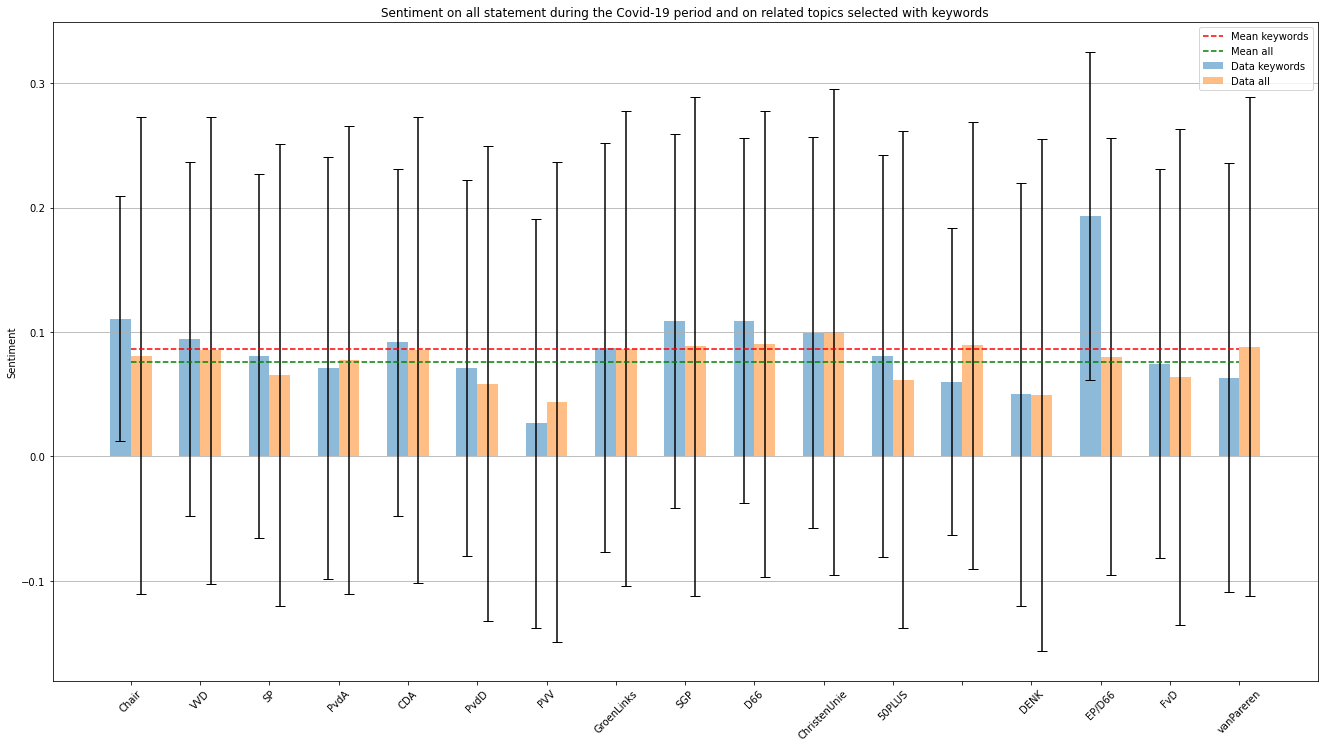

The maxima and minima from the results:
The party with the maximum sentiment score on corona related topics selected with keywords was: EP/D66 , with a score of: 0.19
The party with the maximum sentiment score on statements over the entire Covid-19 period was: ChristenUnie , with a score of: 0.10
The party with the minimum sentiment score on corona related topics selected with keywords was: PVV , with a score of: 0.03
The party with the minimum sentiment score on statements over the entire Covid-19 period was: PVV , with a score of: 0.04


,Party,Average sentiment keywords,Stdev sentiment keywords,N keywords,Average sentiment,Stddev sentiment,N
0,Chair,0.110723,0.098371,33,0.081004,0.191612,895
1,VVD,0.094437,0.142179,1527,0.085158,0.187395,21285
2,SP,0.080751,0.146297,615,0.065373,0.185620,8717
3,PvdA,0.071291,0.169709,494,0.077331,0.188113,6492
4,CDA,0.091795,0.139363,1478,0.085253,0.187276,19135
5,PvdD,0.071108,0.151425,341,0.058569,0.190705,4221
6,PVV,0.026548,0.164312,471,0.043571,0.192833,6957
7,GroenLinks,0.087540,0.164058,534,0.086734,0.190667,8393
8,SGP,0.108949,0.150082,177,0.088410,0.200552,3391
9,D66,0.109141,0.146687,855,0.090386,0.187321,15938


In [11]:
# when relaoding the scores in this cell the last added item will be total so to not add these scores in the graph
# we need to pop the last row, this is a temporary solution
# scores.pop(-1)

# prep for plot
parties = [row[0] for row in scores]
x = np.arange(len(parties))

# plot of results of keyword related text
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
y1 = [row[1] for row in scores]
ax.bar(x-0.15, y1, yerr=[row[2] for row in scores], width=0.3, label='Data keywords', align='center', alpha=0.5, ecolor='black', capsize=5)
y2 = [row[4] for row in scores]
ax.bar(x+0.15, y2, yerr=[row[5] for row in scores], width=0.3, label='Data all', align='center', alpha=0.5, ecolor='black', capsize=5)

# adding mean line
avg_score1 = [np.mean(y1)]*len(x)
mean_line = ax.plot(x, avg_score1, label='Mean keywords', linestyle='--', color='red')

# adding mean line
avg_score2 = [np.mean(y2)]*len(x)
mean_line = ax.plot(x, avg_score2, label='Mean all', linestyle='--', color='green')

legend = ax.legend(loc='upper right')
ax.set_ylabel('Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(parties, rotation=45)
ax.set_title('Sentiment on all statement during the Covid-19 period and on related topics selected with keywords')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('plot_sent.png')

plt.show()

# adding total number of texts and means to represent in later df
scores.append(['Total', np.mean([row[1] for row in scores]), np.std([row[1] for row in scores]), np.sum([row[3] for row in scores]), np.mean([row[4] for row in scores]) , np.std([row[4] for row in scores]), np.sum([row[6] for row in scores])])

# df's with data
df_sent = pd.DataFrame(scores, columns=['Party', 'Average sentiment keywords','Stdev sentiment keywords', 'N keywords','Average sentiment', 'Stddev sentiment', 'N'])

print('The maxima and minima from the results:')
print('The party with the maximum sentiment score on corona related topics selected with keywords was:', parties[y1.index(max(y1))],', with a score of: %.2f' % max(y1))
print('The party with the maximum sentiment score on statements over the entire Covid-19 period was:', parties[y2.index(max(y2))],', with a score of: %.2f' % max(y2))

print('The party with the minimum sentiment score on corona related topics selected with keywords was:', parties[y1.index(min(y1))],', with a score of: %.2f' % min(y1))
print('The party with the minimum sentiment score on statements over the entire Covid-19 period was:', parties[y2.index(min(y2))],', with a score of: %.2f' % min(y2))

df_sent

### 3.4.2. First interpretation <a class="anchor" id="sectionX_4_2"></a>

In the results that can be seen in the data frame above, the 'party' column represents the party that released the statement, the 'average sentiment keywords' column represents the average sentiment on all texts in which a keyword was mentioned, the 'Stdev sentiment keywords' column represents the standard deviation of the sentiment of the texts in which keywords were mentioned, the 'N keywords' column represents the number of times any of the keywords were mentioned in the texts, the 'average sentiment' column represents the average sentiment on all texts, the 'Stdev sentiment' column represents the standard deviation of the sentiment of all texts and the 'N k' column represents the number of texts per party during the Covid-19 period. In the graphs, this data is further represented for visualization.

As can be seen in the graphs above, the scores for the sentiment analysis, when targeted on the keywords, have a higher average result. This means that, when specifically focussing on text related to or about the current pandemic, the average sentiment is higher when politicians spoke about the virus than on average during the entire pandemic. In the next section, the Z-score is calculated to check if any significant differences can be found for the Covid-19 related topics.

Significant differences are: {'PVV': -1.7478468100021776}


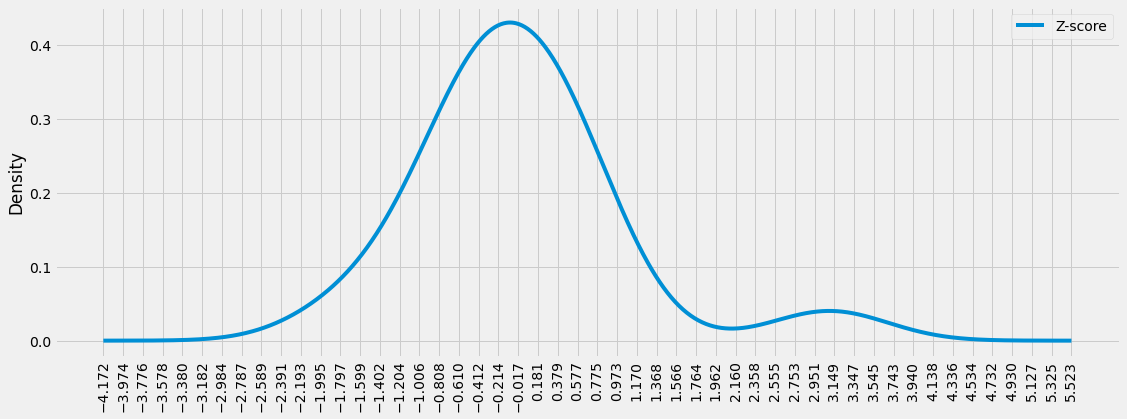

,Party,N keywords,Z-score
0,Chair,33,0.699175
1,VVD,1527,0.225733
2,SP,615,-0.172109
3,PvdA,494,-0.447137
4,CDA,1478,0.148926
5,PvdD,341,-0.452450
6,PVV,471,-1.747847
7,GroenLinks,534,0.025229
8,SGP,177,0.647612
9,D66,855,0.653196


In [12]:
plt.style.use('fivethirtyeight')

parties = df_sent['Party'][:-1]
z_scores = []
sign_dif = {}
i = 0

for score in df_sent['Average sentiment keywords'][:-1]:
    z_score = (score - df_sent['Average sentiment keywords'][df_sent.index[-1]]) / df_sent['Stdev sentiment keywords'][df_sent.index[-1]]
    z_scores.append([df_sent['Party'][i], df_sent['N keywords'][i], z_score])
    
    if df_sent['N keywords'][i] > (df_sent['N keywords'][df_sent.index[-1]] *1/32) and abs(z_score) > 1:
        sign_dif[df_sent['Party'][i]] = z_score
    
    i += 1
    
if bool(sign_dif) == False:
    print('No significant differences were found')
else:
    print('Significant differences are:', sign_dif)

# df for z-scores
df_z = pd.DataFrame(z_scores, columns=['Party', 'N keywords', 'Z-score'])

# plot
ax = df_z.plot(x='N keywords', y='Z-score', kind='kde', figsize=(17, 6))

# plot of the graph
arr = ax.get_children()[0]._x
plt.xticks(np.linspace(arr[0], arr[-1]), rotation=90)
plt.show()

df_z

As can be seen above there was only one party that differed from the other significantly. This party was PVV which had the lowest sentiment scores. Furthermore, the party which was the most positive overall is EP/D66. Nevertheless, the party didn't exceed the threshold therefore this result can't be seen as significant. Furthermore, note that one party didn't receive a name, these statements belonged to the None type and were thus statements released by members of the parliament without a specified party.

### 3.4.3. Second illustration <a class="anchor" id="sectionX_4_3"></a>

In the next section the same plotting methods, as for the graphs above, are applied to the data resulting from the analyses of sentiment when focussing on the three different topics the colors are: blue for the data from the 'horeca' topic, blue for the data from the 'horeca' topic, orange for the data from the 'economie' topic and green for the data from the 'onderwijs' topic. Once again the bar with no specified party belongs to the None section, which represents the statements released by no further specified party. Furthermore, some parties did not release statements on one of the specific topics during the Covid-19 period. Therefore no results are plotted for those topics and parties.

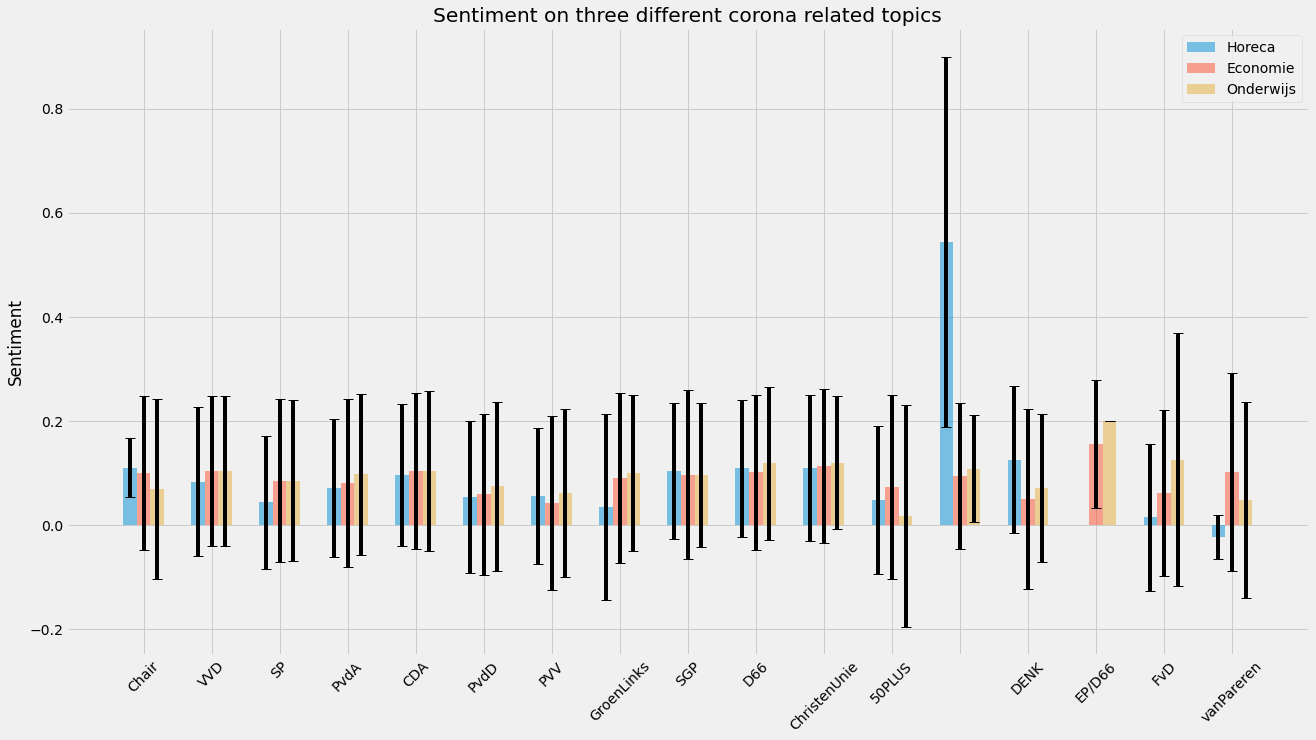

The maxima and minima from the results:
The party with the maximum sentiment score on the topic 'horeca' was: None , with a score of: 0.54
The party with the maximum sentiment score on the topic 'economie' was: EP/D66 , with a score of: 0.16
The party with the maximum sentiment score on the topic 'onderwijs' was: EP/D66 , with a score of: 0.20

The party with the minimum sentiment score on the topic 'horeca' was: vanPareren , with a score of: -0.02
The party with the minimum sentiment score on the topic 'economie' was: PVV , with a score of: 0.04
The party with the minimum sentiment score on the topic 'onderwijs' was: 50PLUS , with a score of: 0.02


,Party,Average sentiment on 'horeca',Stdev sentiment on 'horeca',N 'horeca',Average sentiment on 'economie',Stddev sentiment on 'economie',N 'economie',Average sentiment on 'onderwijs',Stddev sentiment on 'onderwijs',N 'onderwijs'
0,Chair,0.110417,0.056438,4,0.100510,0.147687,116,0.068810,0.172777,9
1,VVD,0.083025,0.143021,284,0.104656,0.143914,2958,0.104000,0.143296,645
2,SP,0.043911,0.127792,98,0.085133,0.156591,1128,0.085349,0.154543,341
3,PvdA,0.071185,0.132172,76,0.081753,0.161251,946,0.097369,0.154914,300
4,CDA,0.095841,0.135928,156,0.103876,0.149760,2360,0.103125,0.153579,399
5,PvdD,0.054238,0.145497,37,0.058904,0.154889,411,0.074663,0.162624,59
6,PVV,0.055853,0.130107,96,0.042567,0.166555,720,0.061812,0.161985,229
7,GroenLinks,0.034870,0.178023,66,0.090326,0.163944,1099,0.099640,0.150194,359
8,SGP,0.104062,0.129772,32,0.097122,0.162366,372,0.095512,0.138335,115
9,D66,0.108968,0.131152,224,0.101083,0.148701,2206,0.118626,0.146395,568


In [13]:
# when relaoding the scores in this cell the last added item will be total so to not add these scores in the graph
# we need to pop the last row, this is a temporary solution
# scores_topics.pop(-1)

# prep for plot
parties = [row[0] for row in scores_topics]
x = np.arange(len(parties))

# plot of results of keyword related text
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
y1 = [row[1] for row in scores_topics]
ax.bar(x-0.2, y1, yerr=[row[2] for row in scores_topics], width=0.2, label='Horeca', align='center', alpha=0.5, ecolor='black', capsize=5)
y2 = [row[4] for row in scores_topics]
ax.bar(x, y2, yerr=[row[5] for row in scores_topics], width=0.2, label='Economie', align='center', alpha=0.5, ecolor='black', capsize=5)
y3 = [row[7] for row in scores_topics]
ax.bar(x+0.2, y3, yerr=[row[8] for row in scores_topics], width=0.2, label='Onderwijs', align='center', alpha=0.5, ecolor='black', capsize=5)

legend = ax.legend(loc='upper right')
ax.set_ylabel('Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(parties, rotation=45)
ax.set_title('Sentiment on three different corona related topics')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('plot_sent_topics.png')

plt.show()

# removing nan from col
cleancol = [i for i in [row[1] for row in scores_topics] if str(i) != 'nan']

# corresponding dataframe
scores_topics.append(['Total', np.mean([cleancol]), np.std([cleancol]), np.sum([row[3] for row in scores_topics]), np.mean([row[4] for row in scores_topics]) , np.std([row[4] for row in scores_topics]), np.sum([row[6] for row in scores_topics]), np.mean([row[7] for row in scores_topics]), np.std([row[7] for row in scores_topics]), np.sum([row[9] for row in scores_topics])])
df_topics = pd.DataFrame(scores_topics, columns=['Party', 'Average sentiment on \'horeca\'','Stdev sentiment on \'horeca\'', 'N \'horeca\'','Average sentiment on \'economie\'', 'Stddev sentiment on \'economie\'', 'N \'economie\'', 'Average sentiment on \'onderwijs\'', 'Stddev sentiment on \'onderwijs\'', 'N \'onderwijs\''])

print('The maxima and minima from the results:')
print('The party with the maximum sentiment score on the topic \'horeca\' was:', parties[y1.index(max(y1))],', with a score of: %.2f' % max(y1))
print('The party with the maximum sentiment score on the topic \'economie\' was:', parties[y2.index(max(y2))],', with a score of: %.2f' % max(y2))
print('The party with the maximum sentiment score on the topic \'onderwijs\' was:', parties[y3.index(max(y3))],', with a score of: %.2f' % max(y3))

print('\nThe party with the minimum sentiment score on the topic \'horeca\' was:', parties[y1.index(min(y1))],', with a score of: %.2f' % min(y1))
print('The party with the minimum sentiment score on the topic \'economie\' was:', parties[y2.index(min(y2))],', with a score of: %.2f' % min(y2))
print('The party with the minimum sentiment score on the topic \'onderwijs\' was:', parties[y3.index(min(y3))],', with a score of: %.2f' % min(y3))

df_topics

### 3.4.4. Second interpretation <a class="anchor" id="sectionX_4_4"></a>

In the results that can be seen in the dataframe above, the 'party' column represents the party which released the statement, the 'average sentiment on horeca' column represents the average sentiment on all texts in which a word from the 'horeca' wordlist was mentioned, the 'Stdev sentiment horeca' column represents the standard deviation of the sentiment of the texts in which a word from the 'horeca' word list was mentioned, the 'N keywords' column represents the number of times a any of the words from the 'horeca' word list were mentioned in the texts, the 'average sentiment on economie' column represents the average sentiment on all texts in which a word from the 'economie' wordlist was mentioned, the 'Stdev sentiment economie' column represents the standard deviation of the sentiment of the texts in which a word from the 'economie' word list was mentioned, the 'N economie' column represents the number of times a any of the words from the 'economie' word list were mentioned in the texts, the 'average sentiment on onderwijs' column represents the average sentiment on all texts in which a word from the 'onderwijs' wordlist was mentioned, the 'Stdev sentiment onderwijs' column represents the standard deviation of the sentiment of the texts in which a word from the 'onderwijs' word list was mentioned and the 'N onderwijs' column represents the number of times a any of the words from the 'onderwijs' word list were mentioned in the texts. In the graphs, this data is further represented for visualization.

No significant differences were found on the topic 'horeca'.
Significant differences on the topic 'economie' are : {'PVV': -1.7768213336702428}
No significant differences were found on the topic 'onderwijs'.


/Users/julottevanderbeek/anaconda3/envs/p36workshop/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/julottevanderbeek/anaconda3/envs/p36workshop/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/julottevanderbeek/anaconda3/envs/p36workshop/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

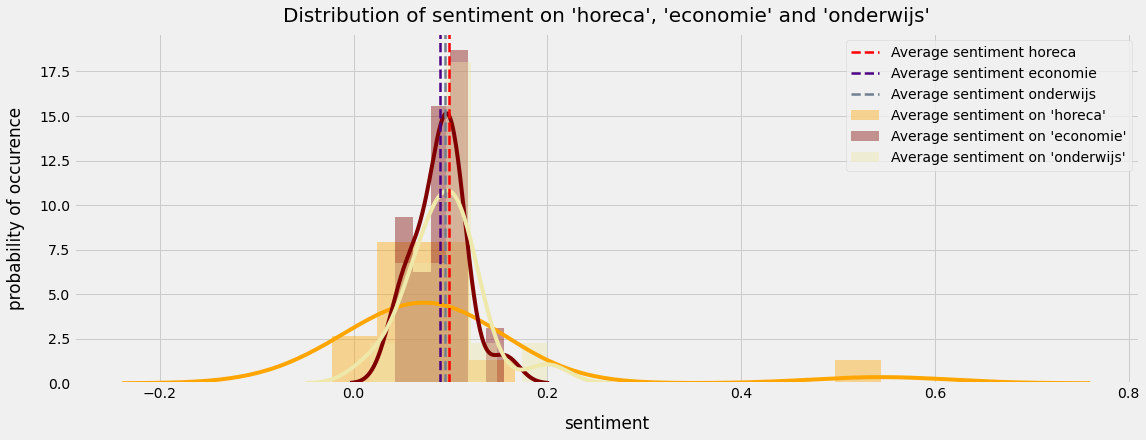

,Party,N 'horeca',Z-score
0,Chair,4,0.094701
1,VVD,284,-0.130883
2,SP,98,-0.453016
3,PvdA,76,-0.228399
4,CDA,156,-0.025335
5,PvdD,37,-0.367960
6,PVV,96,-0.354667
7,GroenLinks,66,-0.527472
8,SGP,32,0.042367
9,D66,224,0.082769


In [14]:
z_scores_horeca = []
z_scores_economie = []
z_scores_onderwijs = []
sign_dif_horeca = {}
sign_dif_economie = {}
sign_dif_onderwijs = {}

for i in range(len(df_topics['Party'][:-1])):
    z_score_horeca = (df_topics['Average sentiment on \'horeca\''][df_topics.index[i]] - df_topics['Average sentiment on \'horeca\''][df_sent.index[-1]]) / df_topics['Stdev sentiment on \'horeca\''][df_sent.index[-1]]
    z_scores_horeca.append([df_topics['Party'][i], df_topics['N \'horeca\''][i], z_score_horeca])
    
    if df_topics['N \'horeca\''][i] > (df_topics['N \'horeca\''][df_topics.index[-1]] * (1/32)) and abs(z_score_horeca) > 1:
        sign_dif_horeca[df_topics['Party'][i]] = z_score_horeca

    z_score_economie = (df_topics['Average sentiment on \'economie\''][df_topics.index[i]] - df_topics['Average sentiment on \'economie\''][df_sent.index[-1]]) / df_topics['Stddev sentiment on \'economie\''][df_sent.index[-1]]
    z_scores_economie.append([df_topics['Party'][i], df_topics['N \'economie\''][i], z_score_economie])
    
    if df_topics['N \'economie\''][i] > (df_topics['N \'economie\''][df_topics.index[-1]] * (1/32)) and abs(z_score_economie) > 1:
        sign_dif_economie[df_topics['Party'][i]] = z_score_economie
    
    z_score_onderwijs = (df_topics['Average sentiment on \'onderwijs\''][df_topics.index[i]] - df_topics['Average sentiment on \'onderwijs\''][df_sent.index[-1]]) / df_topics['Stddev sentiment on \'onderwijs\''][df_sent.index[-1]]
    z_scores_onderwijs.append([df_topics['Party'][i], df_topics['N \'onderwijs\''][i], z_score_onderwijs])
    
    if df_topics['N \'onderwijs\''][i] > (df_topics['N \'onderwijs\''][df_topics.index[-1]] * (1/32)) and abs(z_score_onderwijs) > 1:
        sign_dif_economie[df_topics['Party'][i]] = z_score_onderwijs

if bool(sign_dif_horeca) == False:
    print('No significant differences were found on the topic \'horeca\'.') 
else:
    print('Significant differences on the topic \'horeca\' are :', sign_dif_horeca)
    
if bool(sign_dif_economie) == False:
    print('No significant differences were found on the topic \'economie\'.') 
else:
    print('Significant differences on the topic \'economie\' are :', sign_dif_economie)
    
if bool(sign_dif_onderwijs) == False:
    print('No significant differences were found on the topic \'onderwijs\'.') 
else:
    print('Significant differences on the topic \'onderwijs\' are :', sign_dif_onderwijs)

# df for z-scores horeca
df_hor = pd.DataFrame(z_scores_horeca, columns=['Party', 'N \'horeca\'', 'Z-score'])
# df for z-scores onderwijs
df_eco = pd.DataFrame(z_scores_onderwijs, columns=['Party', 'N \'economie\'', 'Z-score'])
# df for z-scores economie
df_ond = pd.DataFrame(z_scores_economie, columns=['Party', 'N \'onderwijs\'', 'Z-score'])

df_hor_styler = df_hor.style.set_table_attributes("style='display:inline'").set_caption('df horeca')
df_eco_styler = df_eco.style.set_table_attributes("style='display:inline'").set_caption('df economie')
df_ond_styler = df_ond.style.set_table_attributes("style='display:inline'").set_caption('df onderwijs')

fig_dims = (17, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.distplot(df_topics['Average sentiment on \'horeca\''][:-1], color="orange", label='Average sentiment on \'horeca\'')
sns.distplot(df_topics['Average sentiment on \'economie\''][:-1], color="maroon", label='Average sentiment on \'economie\'')
sns.distplot(df_topics['Average sentiment on \'onderwijs\''][:-1], color='palegoldenrod', label='Average sentiment on \'onderwijs\'')
plt.axvline(x=df_topics['Average sentiment on \'horeca\''][df_topics['Average sentiment on \'horeca\''].index[-1]], linestyle='--', linewidth=2.5, label="Average sentiment horeca", c='red')
plt.axvline(x=df_topics['Average sentiment on \'economie\''][df_topics['Average sentiment on \'economie\''].index[-1]], linestyle='--', linewidth=2.5, label="Average sentiment economie", c='indigo')
plt.axvline(x=df_topics['Average sentiment on \'onderwijs\''][df_topics['Average sentiment on \'onderwijs\''].index[-1]], linestyle='--', linewidth=2.5, label="Average sentiment onderwijs", c='slategrey')
plt.xlabel("sentiment", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of sentiment on \'horeca\', \'economie\' and \'onderwijs\'", y=1.015, fontsize=20)
plt.legend();
plt.show()

display_html(df_hor_styler._repr_html_()+df_eco_styler._repr_html_()+df_ond_styler._repr_html_(), raw=True)

As can be seen above the only significant difference that was found was once again for the PVV party, this party also had the most negative sentiment of all parties on the topic 'economie'. The other maximum and minimum scores weren't defined as significant since they did not exceed the threshold $\alpha$. Furthermore, there are no major differences in the distribution of sentiment per topic, as can be seen in the graphs with the distributed data plots, Distribution of sentiment on 'horeca', 'economie' and 'onderwijs.

### 3.4.5. Discussion <a class="anchor" id="sectionX_4_5"></a>

First of all, some possible biases may occur when working with text analysis. One possible bias that might have occurred when trying to find these result is the so-called ‘streetlight effect’, where one will only look where the light is and thus will only find results in that area. Since the questions in this research are all related to specific topics there will be a lot of looking in areas of which it would be reasonable to think that something could be found there. For example, the topics and their corresponding wordlists might have only focussed on a specific relation to the topic and possibly excluded the selection of text in which further results could be found. This might result in a biased selection of texts, which will be analyzed. To avoid this from happening the selected areas must be as diverse as possible, while still focussing on the relevant topic. By expanding on the methods in which certain topics from text are selected different and more diverse results could be found. On the other hand, the search area could also have been too broad, resulting in results that would not only include topic related utterances but also utterances that would not concern the topics.

Second of all, there might be a chance that the software used to analyze the text will miss certain grammatical units. Since the texts that are being analyzed will be almost entirely in Dutch, there is a chance of missing certain grammatical exceptions. Remembering that these tools will not be 100 percent accurate when interpreting the results will be crucial for the correct interpretation.

Last of all, since we deal with a large amount of data spread over a large amount of time, we need to be aware that the possible correlations found may be the result of confounding variables. To avoid this we need to consider previous related research, to be more aware of the mistakes that can be made.


# 3.5. Conclusions <a class="anchor" id="sectionX_5"></a>

### 3.5.1. summary <a class="anchor" id="sectionX_5_1"></a>

When comparing the overall sentiment scores from the period after the start of the Covid-19 pandemic with the sentiment scores on selected topics from the period after the start of Covid-19, no significant differences can be found. During this period the average sentiment score was 0.08 with a standard deviation of 0.02 When comparing these results to the result of each of the selected topics, the parties barely differentiate from these numbers. This would mean that, when analyzing the overall sentiment results, almost all parties would have similar ideologies. 

When looking at the individual topics, bigger differences between parties can be found, but there are still a lot of similarities, with the exception of some outliers. We can see that the None and the van Pareren parties claim the maximum and a minimum overall for the categories 'horeca', but we can also see that there are very few utterances from which these results are derived.

The only party with significant differences is the PVV which has had a significantly low score on all Covid-19 related topics and also had a significantly low score on the topic economie. The PVV is an opposition party from the far right, which means they will often say negative things about the current government and tend to spread more fear than hope. When comparing this political stance with the sentiment scores, these results might indicate that we can derive the political ideology of a party based on sentiment. Nevertheless, this was only the case for a far-right party which is known to be quite negative overall.

When trying to answer the question: ‘What differences in political ideologies, based on the sentiment of dutch parliament parties on Covid-19 related topics, can be derived through the sentiment analysis of political debates? The conclusion, based on the results as presented above, will be that no real significant differences between parties based on sentiment analyses arise. As can be seen in both the results for all corona-related topics and the result for specific topics. Only in the results for one of the topics, namely 'horeca', a large enough difference between all parties can be found, but this difference is only due to the large outlier in this set. When removing this outlier, once again no significant difference will be found. This would also conclude that no significant difference in political ideology was found based on the sentiment of dutch parliament parties on Covid-19 related topics through the sentiment analysis of political debates.

### 3.5.2. Directions future work <a class="anchor" id="sectionX_5_2"></a>

Since we know for a fact that most political parties have different ideologies, we can furthermore conclude that the results from sentiment analysis might not directly refer to the political ideologies. Nevertheless we can also see that the standard deviations in the results are almost equal to the average score meaning that the parties could in fact have similar ideologies but, when in a debate, take on differnt stances on the topics to oppose the other parties on certain topics. Nevertheless to prove this theory more research is needed. A sugestion for such research is focussing more one certain topic and comparing only the debates between two opposing parties. If their average sentiment on the topic would still be very similar, then this theory might be proven.

However, since more research is needed to prove this, other scenario's must be discussed also. One of those scenarios is the analysis of non-related text, this concerns the sentiment analysis itself. While analyzing the texts, the sentiment of the entire text (statement) was taken. This could cause the sentiment to be evened out by the aboundance of text, which might not directly concern the topic. Therefore a sugestion would be to focus on sentences in which the topic is adressed, instead of focussing on the entire statement in which words related to the topic are mentioned.

### 3.5.3. Lessons learned <a class="anchor" id="sectionX_5_3"></a>

We can learn from this research that specific selection of topics and a good selection of data which will be reviewed for the sentiment scores is needed to get better results. Furthermore the use of pattern for a mac OS is much more difficult than for a Linux OS to do it correctly the user needs to install the package through conda, using a specific channel.

# 4. RQ2:  Sentiment between parties before and during covid-19 <a id=RQ2></a>

## 4.1. Introduction research question <a class="anchor" id="section4_1"></a>

### 4.1.1. Motivation <a class="anchor" id="section4_1_1"></a>

The second research question was: *What are the topics where parties would speak with a positive or negative sentiment about each other before and during the pandemic?*

With the elections in the Dutch parliament, there has to be a form of concessions made by the different parties. This is because they have to form a coalition to ensure a majority in the house of representatives as stated in the introduction. A lot of promises made during campaigning get lost to work together with other parties. This research question may help with determining which of these promises are the first one to go, based on the coalition that is forming or which parties can not be included in the coalition.

This notebook tries to handle the question in the following manner. 
At first, the notebook pre-processes the data in a way that no information about a person, party, or date gets lost. After this preprocessing is done, it will seek a mainline within the data. After transformation, it will find the positive and negative periods and store these to find any sentiment in these periods. When it gets a clear view of positive and negative sentiments it can search for the topics behind the positive and negative sentiment respectively.

In this way, the notebook hopes to provide an overview of how parties handle other parties their opinions. Either with positive or negative notions it aims to give more information on different topics within the parliament and between the parties accordingly.

### 4.1.2. Related Literature <a class="anchor" id="section41_2"></a>

Sentiment analysis is a favorable type of text mining for different NLP tasks. There are different types of sentiment analysis. The most common one is working with a lexicon of annotated words. These words carry a sentiment and are annotated by people based on being either positive or negative. Calculate this with the number of times a positive or negative word comes up in accordance with the length of an utterance and it will return a sentiment score. There is also the possibility of using sentiment analysis based on fragments. When annotating sentiment at fragments of speech and using machine learning to handle these fragments research found to have a better method of analysis (Kanayama, 2004).

Latent Dirichlet Analysis is a method for topic analysis and is used a lot to get a clear and fast overview of what topics to expect within a document. However, LDA may not be the best for human interpretation. As it returns keywords instead of topics and could alter every time being used. Still, LDA is one of the foremost in machine learning to get topics for a big corpus (Song, 2009).

## 4.2. Experimental setup <a class="anchor" id="section4_2"></a>

### 4.2.1. Dataset and Preprocessing <a class="anchor" id="section4_2_1"></a>

**4.2.1.1. Note on Data and biases** <a class="anchor" id="section4_2_1_1"></a>

The subset used for this research question will be based on the parties that the notebook receives as input. Because we want to see the differences in sentiment between two different parties we have to filter out the utterances where one party talks about another. Therefore not all the data is used in the analysis.

**4.2.1.2. Preliminaries** <a class="anchor" id="sectionX_2_1_2"></a>

The notebook depends on different libraries for either pre-processing, transformations, and visualization. Extracting the data from the provided XML files relies on XMLTree. To pre-process the data their will be implementations of NLTK and Regex packages. For sentiment analysis the package pattern is used, a version of pattern that is in Dutch to be more precise. At last, we use the library of gensim for topic-analysis. You can get all of these by running the following code in your terminal:
```sh
pip install pattern
pip install regex
pip install elementpath
pip install pandas
pip install matplotlib
pip install --user -U nltk
pip install gensim
pip install sklearn
pip install datetime
```

### 4.2.2. Approach <a class="anchor" id="section4_2_2"></a>

To get some clarity about the data the notebook will find the utterances where the name of another party is used for all the texts of another party. In the compare function, it iterates through all utterances, when it finds the party the user wants to explore it will go on to store the utterances where they used the name of the other party. It stores them into two lists, one for the sentiment values and one for the time values. The sentiment value of an utterance is calculated with the library [pattern](https://github.com/clips/pattern). Pattern is a web mining module for python that includes a tool for NLP, namely 'sentiment'. With the help of the University of Twente they expanded the tool so, that it is also capable to annotate dutch utterances using [pattern.nl](https://research.utwente.nl/en/publications/improving-patternnl-sentiment-analysis). This tool has 6877 unique words annotated with different sentiments. With this data, the notebook is able to provide the first plots to give a sense of what type of utterances we are dealing with. This sentiment analysis is also used in the approach in research question one. However, to make a broad overview of the dynamics within the house of representatives, this research question aims to find the interactions between the parties. In this way, the notebook gives an overview of parties their utterances around covid and their annotated sentiment in the first part and will denote how the parties' attitudes towards each other are in this part. 

With a scatter plot and using sklearns' polynomial regression the notebook aims to find an underlying line in the data. This could give more sense in the periods in which these parties could be more positive or negative about each other. To find the best parameter for the number of polynomial features the notebook uses Random Mean Squared Error. It checks at which k this value is the lowest and eventually shows the plot with this k as polynomial features. With this line, we can get a more descriptive graph of the data.

To see some general statistics the notebook provides a data frame with the mean, minimum, maximum, and standard deviation of the sentiment values. It does this for all the data, before the pandemic, and during the pandemic to give some insight into changes between the parties around the covid outbreak. From a function that makes series with each of the previously named periods, it gets combined in the next function to one data frame.

In [15]:
def compare(party1, party2):
    # Lists for the plot later on
    y = []
    x = []
    wat = []
    # Iterate through the list with class objects
    for i in segs:
        # Find the utterances done by the party one
        if i.party == party1:
            # Try except because some of the utterances were empty and contained nothing
            try:
                # For all the utterances, sometimes it could be more than one in the u leaf as stated above
                for j in range(len(i.seg)):
                    # Check wether the utterance contains the name of the other party
                    if party2 in i.seg[j]:
                        # Store these utterances, sentiment and date in new lists
                        wat.append(i.seg[j])
                        y.append(sentiment(i.seg[j])[0])
                        x.append(i.time)
            except TypeError:
                continue
                
    # Find the date closest to the first Covid debate 
    for k in x:
        if k[:-1] == '2019-10-0':
            cov = x.index(k)
            break

    try:      
        return x, y, cov
    except UnboundLocalError:
        return x, y

k = 7
0.18399967064250217


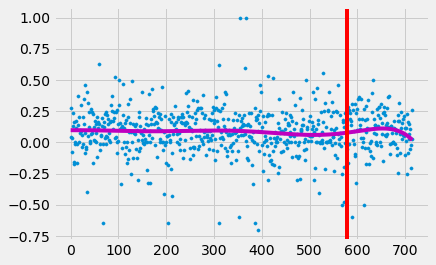

,all data,pre-covid,covid
minimum,-0.700000,-0.700000,-0.600000
maximum,1.000000,1.000000,0.500000
mean,0.085932,0.084474,0.092574
std,0.184584,0.188210,0.168783


In [16]:
def poly(party1, party2):
    rmse = []
    comp = compare(party1, party2)
    y = comp[1]
    x = np.array([i for i in range(len(y))]).reshape(-1,1)
    for j in range(0,40):
        polynomial_features= PolynomialFeatures(degree=j)
        x_poly = polynomial_features.fit_transform(x)
        model = LinearRegression()
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)
        rmse.append(np.sqrt(mean_squared_error(y,y_poly_pred)))

    print('k =', rmse.index(min(rmse)))
    print(min(rmse))


    polynomial_features= PolynomialFeatures(degree=rmse.index(min(rmse)))
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    plt.scatter(x, y, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.axvline(comp[2], color='r')
    plt.show()
    

def serie(party1, party2, cov=0):
    if cov == 0:
        comp = compare(party1, party2)[1]
    elif cov == 1: 
        comp = compare(party1, party2)[1][compare(party1, party2)[2]:-1]
    else:
        comp = compare(party1, party2)[1][0:compare(party1, party2)[2]]
    minimum = min(comp)
    maximum = max(comp)
    mean = np.mean(comp)
    std = np.std(comp)

    return pd.Series([minimum, maximum, mean, std], index=['minimum', 'maximum', 'mean', 'std'])

def dataframe(party1, party2):
    alles = serie(party1, party2, 0)
    precovid = serie(party1, party2, 2)
    covid = serie(party1, party2, 1)
    
    return pd.DataFrame({'all data': alles,'pre-covid':precovid, 'covid':covid})

# Example:
poly("VVD", "GroenLinks")
dataframe("VVD", "GroenLinks")

### 4.2.3. Implementation <a class="anchor" id="section4_2_3"></a>

**Rolling window**

Now that the notebook provided some general plots and statistics of the data, it transforms the data. This is done by using a rolling window of the time series to give stability to the data over the utterances of their sentiment. The rolling window takes the mean over 30 days and uses this as one data point. In this way, all the utterances and their sentiment within one month will be averaged and stored. <img src='rolling-window.jpeg' width='400'>  
To use the utterances behind the sentiment score for topic analysis we need to process the strings. Therefore the notebook needs to delete some stopwords. For the collection of stopwords, the notebook uses a text file containing over 300 words. 

To help and find the topic of utterances, the notebook has the topic function. In the topic function, the notebook searches for the relevant utterances and their dates. When it finds all utterances from a specified party about one other party it stems them using the [snowball stemmer from the NLTK library](https://www.nltk.org/_modules/nltk/stem/snowball.html), this stemmer has a dutch implementation. The function also accepts a covid variable specifying in which period we are interested. After this process, it returns the stemmed utterances within the specified dates.

**Zero-crossing**

To establish in which periods the parties were more positive or negative about each other the notebook has a function to check where the plot crosses the zero line. Whenever it crosses the line, it stores the index to mark the dates between wich there are negative and positive sentiments. These indices can be used in the topic function to retrieve the utterances from these areas above and under zero. <img src='zerocrossing.png' width='500'>

k = 7
0.18399967064250217


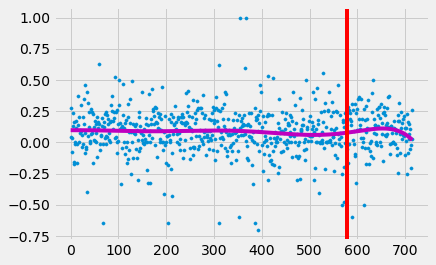

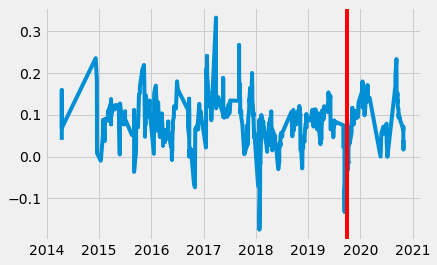

In [17]:
def roller(party1, party2):
    # Get the utterances where parties talk about eachother
    a = compare(party1, party2)
    # Get the dates from the utterances
    index = a[0]
    # Get the sentiment values of the utterances
    values = a[1]
    # Get the index of the date for the first debate during covid
    cov = index[a[2]]
    # Make a dataframe of the sentiment values with date as index
    df = pd.DataFrame(data={'Sentiment':values}, index=pd.to_datetime(index))
    # Return a rolling window over 30 days with method mean and the date of the first covid debate
    return df.rolling(window='30d').mean(), date(int(cov[0:4]), int(cov[5:7]), int(cov[8:10]))


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    # Open text files with stopwords
    a_file = open("stopwords.txt", "r")
    stop_words = []
    for line in a_file:
        # Strip whitelines from text line
        stripped_line = line.strip()
        # Store stopword in string in list
        stop_words.append(stripped_line)
    a_file.close()
    # Return input string without stopwords
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

def topic(party1, party2, van, tot, cov=0):
    wat = []
    x = []
    stemmer = SnowballStemmer("dutch")
    for i in segs:
        if i.party == party1:
            try:
                for j in range(len(i.seg)):
                    if party2 in i.seg[j]:
                        wat.append(i.seg[j])
                        x.append(date(int(i.time[0:4]), int(i.time[5:7]),int(i.time[8:10])))
            except TypeError:
                continue

    van = x.index(van)
    tot = x.index(tot)
    if cov == 1:
        wat = wat[x.index(roller(party1, party2)[1]):]
    elif cov == 2:
        wat = wat[:x.index(roller(party1, party2)[1])] 
    

    all_text = []
    for i in wat[van:tot]:
        i = re.sub('[,\.!?]', '', i)
        i = i.lower()
        i = stemmer.stem(i)


        all_text.append(i)
        
    all_text = remove_stopwords(list(sent_to_words(all_text)))
    return all_text


def zerocrosser(party1, party2):
    a = roller(party1, party2)
    if a[0]['Sentiment'].tolist()[0] > 0:
        k = 1
    else:
        k = -1
    zero_crossings = np.where(np.diff(np.sign(a[0]['Sentiment'].tolist())))[0]
    index = a[0].index
    ret = []
    for i in zero_crossings:
        ret.append(index[i])
    return ret, k

# Example rolling window:

poly("VVD", "GroenLinks")
plt.plot(roller("VVD", "GroenLinks")[0])
plt.axvline(x=roller("VVD", "GroenLinks")[1], color='r')
plt.show()

**TF-IDF and LDA**

In the function all topics the notebook uses the indices from zerocrosser function and the utterance retrieving of the  topic function to get the utterances within the positive and negative areas and combine them within lists to make to store them for later use. It also stores all utterances, either positive or negative to create a corpus of all the utterances made between specified party one and two. From this corpus the notebook also creates a dictionary without words that occur no more than 2 times within the corpus. The corpus then gets transformed using a TF IDF function. This gives weights to certain words and their documents. 
With term frequency as:
$${tf} (t,d)={\frac {f_{t,d}}{\sum _{t'\in d}{f_{t',d}}}}$$
The inverse document frequency as:
$${idf} (t, D) =  \log \frac{N}{|\{d \in D: t \in d\}|}$$
Combined to form the TF IDF:
$$ {tfidf} (t,d,D)={tf} (t,d)\cdot \mathrm {idf} (t,D)$$
Where t denotes term, d denotes document and D denotes the set of documents.

With this dictionary and corpus, the notebook uses the [Gensim](https://radimrehurek.com/gensim/) library to perform a Latent Dirichlet Allocation (LDA) topic analysis. LDA builds a topic per document model and words per topic model. These are modeled as Dirichlet distributions. Where Dirichlet distributions entail the conjugate prior of the categorical distribution and multinomial distribution. The Gensim tool trains the LDA model to find keywords around the different utterances stored in the corpus. If the notebook specifies an utterance within the corpus, it will return a number of keywords for each topic within the corpus and calculates the probability of the utterance correlating to one of these topics.

To combine all the techniques used above the notebook has a function called *alles*. This function will ask for two parties that we are interested in and returns the general statistics, the rolling window plot with a red vertical line denoting the start of a debate about Covid and the most probable topics' their keywords within different periods. These keywords are found in the all topics function with the use of the LDA-analysis. It calculates the overall probability of topics being related to the negative or positive sentiment overall. When this probability is above 0.3 it prints the numbers of their topics and their keywords.

In [18]:
def all_topics(party1, party2, cov=0):
    ind = zerocrosser(party1, party2)[0]        
    pos = []
    neg = []
    all_text = []
    for i in range(len(ind)-1):
        a = topic(party1, party2, ind[i], ind[i+1], cov)
        if a == None:
            continue
        if i % 2 != 0:
            pos.extend(a)
        else:
            neg.extend(a)
        all_text.append(a)
    checker = []
    all_text = remove_stopwords(list(sent_to_words(all_text)))
    id2word = corpora.Dictionary(all_text)
    id2word.filter_extremes(no_below=2)
    corpus = [id2word.doc2bow(text) for text in all_text]
    tfidf = models.TfidfModel(corpus)
    corpus = tfidf[corpus]
    for k in range(2,15):
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=k)
        cm = CoherenceModel(model=lda_model, corpus=corpus, texts=all_text, coherence='c_v')
        checker.append(cm.get_coherence()) 
                
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=checker.index(max(checker))+2,
                                          random_state=100)
            
    return lda_model, corpus, checker.index(max(checker))+2, max(checker), pos, neg


def alles(party1, party2):
    print(party1+ ' over '+ party2)
    print('General statistics:')
    print('\n')
    print(dataframe(party1, party2).head())
    print('\n')
    print("Mean sentiment after rolling window of 30 days: "+ str(np.mean(roller('VVD', 'GroenLinks')[0]['Sentiment'].tolist())))  
    print('Graph using rolling window of 30 days:')
    plt.plot(roller(party1, party2)[0])
    plt.axvline(x=roller(party1, party2)[1], color='r')
    plt.show()
    
    
    for i in range(3):
        all_tops = all_topics(party1, party2, i)
        if i == 0:
            print('All Data')
        elif i == 1:
            print('Before Covid')
        else:
            print('During Covid')
        print('\n')
        topicspos = []
        topicsneg = []
    
        for i in range(len(all_tops[1])):
            if i % 2 == 0:
                topicspos.append(all_tops[0][all_tops[1][i]])
            else:
                topicsneg.append(all_tops[0][all_tops[1][i]])
            
        if zerocrosser(party1, party2)[1] < 0:
            topicspos, topicsneg = topicsneg, topicspos
        
        
        pos = {}
        neg = {}

        for i in topicspos:
            for j in i:
                if j[0] in pos.keys():
                    pos[j[0]].append(j[1])
                else:
                    pos[j[0]] = [j[1]]
            
        for i in topicsneg:
            for j in i:
                if j[0] in neg.keys():
                    neg[j[0]].append(j[1])
                else:
                    neg[j[0]] = [j[1]]
        

        print('{} topics with a coherence value of {}'.format(all_tops[2], all_tops[3]))   
        interestingtopics = []
        print("Positive topics with a probability of >0.3:")
        a = 0
        for k in pos.keys():
            if len(pos[k]) == 0:
                continue
            if sum(pos[k])/len(pos[k]) > 0.3:
                interestingtopics.append(k)
                print(k, ' : ', sum(pos[k])/len(pos[k]))
        print("Negative topics with a probability of >0.3:")
        for k in neg.keys():
            if len(neg[k]) == 0:
                continue
            if sum(neg[k])/len(neg[k]) > 0.3: 
                interestingtopics.append(k)
                print(k, ' : ', sum(neg[k])/len(neg[k]))
        
        print('\n')
        for i,topic in all_tops[0].show_topics(formatted=True, num_topics=all_tops[2], num_words=20):
            if i in interestingtopics:
                print(str(i)+": "+ topic) 
                print()
        print('\n')

**Rule-Based**

With the LDA topic analysis, the notebook does not return satisfying results every time. Notes about this will be found later on in the discussion. To ensure we get an overview of negative and positive sentiment between different parties the notebook has another topic analysis implementation that starts with another all topics function. This function works the same as the all topics function above, except it returns the positive and negative utterances combined from the topic function above. It does not perform any computation on them, it just joins them together.

To determine the topic from different utterances the notebook aims to find words that are being used in these utterances that have an affiliation with one of the pre-determined topics. Therefore this approach will be rule-based and would not provide new topics that are not denoted within the notebook. To create a list with words affiliated to topics the notebook uses wordnet hyponyms and synonyms. [Wordnet](https://www.nltk.org/howto/wordnet.html) is part of NLTK in python and serves as an archive of word etymology. The topics are pre-determined based on the information provided by the dutch [Rijks Overheid](https://www.rijksoverheid.nl/onderwerpen/veranderingen). Every year they provide a webpage with information about what will change in the next year according to new laws. They divide these laws into six topics:

Work and income

Health and healthcare

Family

Traffic and transport

Living

Corporate

In addition to these six topics we provided the notebook with some other prominent subjects the parliament discusses. These topics are:

Immigration

Foreign affairs

Education

Agriculture


Not every party has the same interests as the others do. So to compare if they talk less or more about a subject in respect to other parties the notebook establishes the presence of these topics on average. It iterates over all the topics within a specified period and makes a baseline for the topics. In the average function it stores all the utterances made by the party in general. The returned list will be used by the notebook in the function *topic checker average*. Here the percentages of occurrence of these keywords will be calculated to denote their overall occurrence in utterances made by the party. Some more right-wing parties will be seen making more utterances about the economy than about family for example.

When the notebook wants to calculate the differences between occurrences of different topics in general and when a party names another party, the notebook compares the two percentages with the formula:

$$\frac{P_{party} - P_{average}}{\frac{P_{party}+P_{average}}{2}}$$

Eventually, in the function *topic checker* the notebook finds the occurrence of the keywords in the utterances that are either negative or positive and compares the percentages calculated with the percentage of average. It does this for the time periods: all data, before covid and during covid. It returns the data frames of the periods with their negative and positive topics. In this way, it is easier to compare the results between pre-pandemic and during the pandemic.

In [19]:
def all_topics_perc(party1, party2, cov=0):
    ind = zerocrosser(party1, party2)[0]        
    pos = []
    neg = []
    all_text = []
    for i in range(len(ind)-1):
        a = topic(party1, party2, ind[i], ind[i+1], cov)
        if a == None:
            continue
        if i % 2 != 0:
            pos.extend(a)
        else:
            neg.extend(a)
            
        if zerocrosser(party1, party2)[1] < 0:
            pos, neg = neg, pos
            
        
        all_text.append(a)

    all_text = remove_stopwords(list(sent_to_words(all_text)))
    
                
    return pos, neg, all_text


def subjects():
    wordlst_economie = ['werk', 'inkomen']
    keywords_economie = ['werk', 'inkomen']
    wordlst_zorg = ['zorg', 'gezondheid']
    keywords_zorg = ['zorg', 'gezondheid']
    wordlst_familie = ['familie', 'gezin']
    keywords_familie = ['familie', 'gezin']
    wordlst_verkeer = ['verkeer', 'vervoer']
    keywords_verkeer = ['verkeer', 'vervoer']
    wordlst_wonen = ['wonen']
    keywords_wonen = ['wonen']
    wordlst_ondernemen = ['ondernemen']
    keywords_ondernemen = ['ondernemen']
    wordlst_immigratie = ['immigratie', 'vluchtelingen']
    keywords_immigratie = ['immigratie', 'vluchtelingen']
    wordlst_buitenland = ['Europa', 'buitenland']
    keywords_buitenland = ['Europa', 'buitenland']
    wordlst_onderwijs = ['onderwijs', 'jongeren']
    keywords_onderwijs = ['onderwijs', 'jongeren']
    wordlst_landbouw = ['boeren', 'landbouw']
    keywords_landbouw = ['boeren', 'landbouw']

    for word in keywords_economie:
        wordlst_economie.append(pluralize(word))
        syns = wordnet.synsets(word, lang='nld')
        for i in range (len(syns)):
            for j in range (len(syns[i].lemmas(lang='nld'))):
                if syns[i].lemmas(lang='nld')[j].name() not in wordlst_economie:
                    wordlst_economie.append(syns[i].lemmas(lang='nld')[j].name())
                    wordlst_economie.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))
                    
    for word in keywords_zorg:
        wordlst_zorg.append(pluralize(word))
        syns = wordnet.synsets(word, lang='nld')
        for i in range (len(syns)):
            for j in range (len(syns[i].lemmas(lang='nld'))):
                if syns[i].lemmas(lang='nld')[j].name() not in wordlst_zorg:
                    wordlst_zorg.append(syns[i].lemmas(lang='nld')[j].name())
                    wordlst_zorg.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))
                    
    for word in keywords_familie:
        wordlst_familie.append(pluralize(word))
        syns = wordnet.synsets(word, lang='nld')
        for i in range (len(syns)):
            for j in range (len(syns[i].lemmas(lang='nld'))):
                if syns[i].lemmas(lang='nld')[j].name() not in wordlst_familie:
                    wordlst_familie.append(syns[i].lemmas(lang='nld')[j].name())
                    wordlst_familie.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))
    
    for word in keywords_verkeer:
        wordlst_verkeer.append(pluralize(word))
        syns = wordnet.synsets(word, lang='nld')
        for i in range (len(syns)):
            for j in range (len(syns[i].lemmas(lang='nld'))):
                if syns[i].lemmas(lang='nld')[j].name() not in wordlst_verkeer:
                    wordlst_verkeer.append(syns[i].lemmas(lang='nld')[j].name())
                    wordlst_verkeer.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))
                    
    for word in keywords_wonen:
        wordlst_wonen.append(pluralize(word))
        syns = wordnet.synsets(word, lang='nld')
        for i in range (len(syns)):
            for j in range (len(syns[i].lemmas(lang='nld'))):
                if syns[i].lemmas(lang='nld')[j].name() not in wordlst_wonen:
                    wordlst_wonen.append(syns[i].lemmas(lang='nld')[j].name())
                    wordlst_wonen.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))
                    
    for word in keywords_ondernemen:
        wordlst_ondernemen.append(pluralize(word))
        syns = wordnet.synsets(word, lang='nld')
        for i in range (len(syns)):
            for j in range (len(syns[i].lemmas(lang='nld'))):
                if syns[i].lemmas(lang='nld')[j].name() not in wordlst_ondernemen:
                    wordlst_ondernemen.append(syns[i].lemmas(lang='nld')[j].name())
                    wordlst_ondernemen.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))
                    
    for word in keywords_immigratie:
        wordlst_immigratie.append(pluralize(word))
        syns = wordnet.synsets(word, lang='nld')
        for i in range (len(syns)):
            for j in range (len(syns[i].lemmas(lang='nld'))):
                if syns[i].lemmas(lang='nld')[j].name() not in wordlst_immigratie:
                    wordlst_wonen.append(syns[i].lemmas(lang='nld')[j].name())
                    wordlst_wonen.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))
                    
    for word in keywords_buitenland:
        wordlst_buitenland.append(pluralize(word))
        syns = wordnet.synsets(word, lang='nld')
        for i in range (len(syns)):
            for j in range (len(syns[i].lemmas(lang='nld'))):
                if syns[i].lemmas(lang='nld')[j].name() not in wordlst_buitenland:
                    wordlst_buitenland.append(syns[i].lemmas(lang='nld')[j].name())
                    wordlst_buitenland.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))
                    
    for word in keywords_onderwijs:
        wordlst_onderwijs.append(pluralize(word))
        syns = wordnet.synsets(word, lang='nld')
        for i in range (len(syns)):
            for j in range (len(syns[i].lemmas(lang='nld'))):
                if syns[i].lemmas(lang='nld')[j].name() not in wordlst_onderwijs:
                    wordlst_onderwijs.append(syns[i].lemmas(lang='nld')[j].name())
                    wordlst_onderwijs.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))
                    
    for word in keywords_landbouw:
        wordlst_landbouw.append(pluralize(word))
        syns = wordnet.synsets(word, lang='nld')
        for i in range (len(syns)):
            for j in range (len(syns[i].lemmas(lang='nld'))):
                if syns[i].lemmas(lang='nld')[j].name() not in wordlst_landbouw:
                    wordlst_landbouw.append(syns[i].lemmas(lang='nld')[j].name())
                    wordlst_landbouw.append(pluralize(syns[i].lemmas(lang='nld')[j].name()))
                    
    return wordlst_economie , wordlst_zorg , wordlst_familie , wordlst_verkeer , wordlst_wonen , wordlst_ondernemen , wordlst_immigratie , wordlst_buitenland, wordlst_onderwijs, wordlst_landbouw 
 
    
def average(party1, party2, cov=0):
    
    wat = []
    x = []
    stemmer = SnowballStemmer("dutch")
    for i in segs:
        if i.party == party1:
            try:
                for j in range(len(i.seg)):
                    wat.append(i.seg[j])
                    x.append(date(int(i.time[0:4]), int(i.time[5:7]),int(i.time[8:10])))
            except TypeError:
                continue

    if cov == 1:
        wat = wat[x.index(roller(party1, party2)[1]):]
    elif cov == 2:
        wat = wat[:x.index(roller(party1, party2)[1])]  

    all_text = []
    for j in wat:
        try:
            for i in j:
                i = re.sub('[,\.!?]', '', i)
                i = i.lower()
                i = stemmer.stem(i)
            all_text.append(j)
        except TypeError:
            continue

    wat = remove_stopwords(list(sent_to_words(all_text)))
    return wat


def topic_checker_avg(party1, party2, cov=0):
    all_tops = average(party1, party2, cov)
    subs = subjects()
    
    econ = 0
    zorg = 0
    familie = 0
    verkeer = 0
    wonen = 0
    ondernemen = 0
    immigratie = 0
    buitenland = 0
    onderwijs = 0
    landbouw = 0
    
    
    for i in all_tops:
        for j in i:
            if j in subs[0]:
                econ += 1
            elif j in subs[1]:
                zorg += 1
            elif j in subs[2]:
                familie += 1
            elif j in subs[3]:
                verkeer += 1
            elif j in subs[4]:
                wonen += 1
            elif j in subs[5]:
                ondernemen += 1
            elif j in subs[6]:
                immigratie += 1
            elif j in subs[7]:
                buitenland += 1
            elif j in subs[8]:
                onderwijs += 1
            elif j in subs[9]:
                landbouw += 1

    summation = econ+zorg+familie+verkeer+wonen+ondernemen+immigratie+buitenland+onderwijs+landbouw
    econ = econ/summation*100
    zorg = zorg/summation*100
    familie =  familie/summation*100
    verkeer = verkeer/summation*100
    wonen = wonen/summation*100
    ondernemen = ondernemen/summation*100
    immigratie = immigratie/summation*100
    buitenland = buitenland/summation*100
    onderwijs = onderwijs/summation*100
    landbouw = landbouw/summation*100
    return econ, zorg, familie, verkeer, wonen, ondernemen, immigratie, buitenland, onderwijs, landbouw
    
a = topic_checker_avg('VVD', 'GroenLinks')
econ = a[0]
zorg = a[1]
familie = a[2]
verkeer = a[3]
wonen = a[4]
ondernemen = a[5]
immigratie = a[6]
buitenland = a[7]
onderwijs = a[8]
landbouw = a[9]


def percentage(avg, new):
    return (new - avg)/((avg+new)/2)*100


def topic_checker(party1, party2):
    data = {"all":[], 'before covid':[], 'during covid':[]}
    datanames = ["all", 'before covid', 'during covid']
    for k in range(3):
        politicspos = {'economy':[],'healthcare':[],'family':[],'traffic':[],'living':[],'corporate':[],'immigration':[],'international':[],'education':[],'farming':[]}
        politicsneg = {'economy':[],'healthcare':[],'family':[],'traffic':[],'living':[],'corporate':[],'immigration':[],'international':[],'education':[],'farming':[]}
        a = topic_checker_avg('VVD', 'GroenLinks', k)
        econ1 = a[0]
        zorg1 = a[1]
        familie1 = a[2]
        verkeer1 = a[3]
        wonen1 = a[4]
        ondernemen1 = a[5]
        immigratie1 = a[6]
        buitenland1 = a[7]
        onderwijs1 = a[8]
        landbouw1 = a[9]
        
        all_tops = all_topics_perc(party1, party2, cov=k)
        subs = subjects()
    
        econ = 0
        zorg = 0
        familie = 0
        verkeer = 0
        wonen = 0
        ondernemen = 0
        immigratie = 0
        buitenland = 0
        onderwijs = 0
        landbouw = 0
    
    
        for i in all_tops[0]:
            for j in i:
                if j in subs[0]:
                    econ += 1
                elif j in subs[1]:
                    zorg += 1
                elif j in subs[2]:
                    familie += 1
                elif j in subs[3]:
                    verkeer += 1
                elif j in subs[4]:
                    wonen += 1
                elif j in subs[5]:
                    ondernemen += 1
                elif j in subs[6]:
                    immigratie += 1
                elif j in subs[7]:
                    buitenland += 1
                elif j in subs[8]:
                    onderwijs += 1
                elif j in subs[9]:
                    landbouw += 1
                
        summation = econ+zorg+familie+verkeer+wonen+ondernemen+immigratie+buitenland+onderwijs+landbouw
        politicspos['economy'].append(percentage(econ1, econ/summation*100))
        politicspos['healthcare'].append(percentage(zorg1, zorg/summation*100))
        politicspos['family'].append(percentage(familie1, familie/summation*100))
        politicspos['traffic'].append(percentage(verkeer1, verkeer/summation*100))
        politicspos['living'].append(percentage(wonen1, wonen/summation*100))
        politicspos['corporate'].append(percentage(ondernemen1, ondernemen/summation*100))
        politicspos['immigration'].append(percentage(immigratie1, immigratie/summation*100))
        politicspos['international'].append(percentage(buitenland1, buitenland/summation*100))
        politicspos['education'].append(percentage(onderwijs1, onderwijs/summation*100))
        politicspos['farming'].append(percentage(landbouw1, landbouw/summation*100))

        econ = 0
        zorg = 0
        familie = 0
        verkeer = 0
        wonen = 0
        ondernemen = 0
        immigratie = 0
        buitenland = 0
        onderwijs = 0
        landbouw = 0
    
    
        for i in all_tops[1]:
            for j in i:
                if j in subs[0]:
                    econ += 1
                elif j in subs[1]:
                    zorg += 1
                elif j in subs[2]:
                    familie += 1
                elif j in subs[3]:
                    verkeer += 1
                elif j in subs[4]:
                    wonen += 1
                elif j in subs[5]:
                    ondernemen += 1
                elif j in subs[6]:
                    immigratie += 1
                elif j in subs[7]:
                    buitenland += 1
                elif j in subs[8]:
                    onderwijs += 1
                elif j in subs[9]:
                    landbouw += 1
                
        summation = econ+zorg+familie+verkeer+wonen+ondernemen+immigratie+buitenland+onderwijs+landbouw
        politicsneg['economy'].append(percentage(econ1, econ/summation*100))
        politicsneg['healthcare'].append(percentage(zorg1, zorg/summation*100))
        politicsneg['family'].append(percentage(familie1, familie/summation*100))
        politicsneg['traffic'].append(percentage(verkeer1, verkeer/summation*100))
        politicsneg['living'].append(percentage(wonen1, wonen/summation*100))
        politicsneg['corporate'].append(percentage(ondernemen1, ondernemen/summation*100))
        politicsneg['immigration'].append(percentage(immigratie1, immigratie/summation*100))
        politicsneg['international'].append(percentage(buitenland1, buitenland/summation*100))
        politicsneg['education'].append(percentage(onderwijs1, onderwijs/summation*100))
        politicsneg['farming'].append(percentage(landbouw1, landbouw/summation*100))
        
        data[datanames[k]].append(politicspos)
        data[datanames[k]].append(politicsneg)
        
    all_data = data['all']
    before = data['before covid']
    during = data['during covid']
    print('All data')
    print(pd.DataFrame(all_data).head())
    print('Before Covid')
    print(pd.DataFrame(before).head())
    print('During Covid')
    print(pd.DataFrame(during).head()) 

## 4.3. Evaluation <a class="anchor" id="section4_3"></a>

### 4.3.1. metrics <a class="anchor" id="section4_3_1"></a>

The polynomial regression function has built-in that it uses the k parameter with the lowest Random Mean Squared Error. The function prints the k that has been found and the error score for this function. This is built in the function since it is different for every party. For the parties we use in the results, the VVD and GroenLinks:

k = 7 with a RMSE of 0.18399967064250217

The LDA topic analysis has a built-in function to find the highest topic coherence score. This coherence score is calculated by a tool from the Gensim library. This is a pipeline based on four stages namely: segmentation, probability estimation, confirmation measure, aggregation. Again this is built-in because it differs between the parties and the LDA algorithm has a random state. For producibility reasons, we set the random state to 100. For the parties we use in the results, the VVD and GroenLinks:

<img src='Coh_LDA.png' width=400>

### 4.3.2. results <a class="anchor" id="section4_3_1"></a>

The notebook can run its functions for every party that has been operational within the dutch parliament in the last couple of years. To evaluate results the notebook will use the parties 'VVD' and 'GroenLinks' as they are seen as steady right and left in the political landscape. These parties also are included in the house of representatives in all data available. The data is then being divided into three types. First, it uses all the data available to have a general picture and use in plots. After that, it uses the subset before and during the pandemic separately.

## 4.4. Findings <a class="anchor" id="section4_4"></a>

### 4.4.1. First illustration <a class="anchor" id="section4_4_1"></a>

In the first illustration, the notebook uses the function *alles*. This function returns some general statistics in the form of a DataFrame. This contains the maximum, minimum, mean, and standard deviation of the sentiment analysis after the rolling window transformation. It also plots the graph after the transformation to show how the sentiment through time will be.
Then it will return the outcomes of the LDA-based topic search. It performs the LDA search for the three time periods stated in the Results Section. At first, it prints the number of topics made and their coherence values. After that, it will return, per time period, the topics with the highest probabilities for the utterances it had as input with the keywords affiliated with the topics.  

VVD over GroenLinks
General statistics:


         all data  pre-covid     covid
minimum -0.700000  -0.700000 -0.600000
maximum  1.000000   1.000000  0.500000
mean     0.085932   0.084474  0.092574
std      0.184584   0.188210  0.168783


Mean sentiment after rolling window of 30 days: 0.08508826949231355
Graph using rolling window of 30 days:


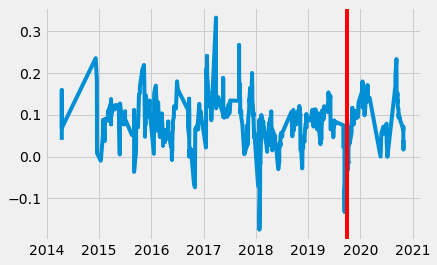

All Data


3 topics with a coherence value of 0.4933793216191713
Positive topics with a probability of >0.3:
0  :  0.3316199820488691
2  :  0.5056535065174103
Negative topics with a probability of >0.3:
1  :  0.4662483311775658
2  :  0.3358032150814931


0: 0.001*"afbouwen" + 0.001*"grashoff" + 0.001*"cijfers" + 0.001*"loondispensatie" + 0.001*"hinderbeperking" + 0.001*"snel" + 0.001*"apparaat" + 0.001*"uitwerk" + 0.001*"stel" + 0.001*"zomer" + 0.001*"hoop" + 0.001*"ambtelijke" + 0.001*"heren" + 0.001*"gasverbruik" + 0.001*"alternatief" + 0.001*"besef" + 0.001*"voortman" + 0.001*"sociale" + 0.001*"vastleggen" + 0.001*"dijk"

1: 0.001*"komt" + 0.001*"grashoff" + 0.001*"plekken" + 0.001*"energie" + 0.001*"zit" + 0.001*"helemaal" + 0.001*"km" + 0.001*"gemeente" + 0.001*"duurzame" + 0.001*"locaties" + 0.001*"antwoord" + 0.001*"fractie" + 0.001*"ervoor" + 0.001*"zorg" + 0.001*"nieuwe" + 0.001*"zeer" + 0.001*"grote" + 0.001*"formatie" + 0.001*"overheid" + 0.001*"bedrijven"

2: 0.001*"ervarin

In [20]:
alles("VVD", "GroenLinks")

### 4.4.2. First interpretation <a class="anchor" id="section4_4_2"></a>

As stated before, the results the notebook provides with the use of LDA are not the topics themselves. The LDA provides the keywords affiliated with the topics that are made by the model. Therefore it is still to the human interpretation of these keywords to denote a certain topic to these keywords. As we can see not all the topics are easy to denote or are incoherent with the amount of time passed and thereby the number of different topics uttered in the house of representatives. 

It can be noted that the topics of the smaller amount of time, the ‘during covid’ period, make a lot more sense than those of the larger periods.
The topics that the right-wing party the VVD is negative about when talking about the left-wing party GroenLinks before the pandemic are not very definitive. It tells us something about positive notions when talking about trains, government, gas usage, and progress.
However in the results from during the pandemic we see a change in the way gas usage is denoted. This is now not in a positive manner, but negative. Furthermore, it states that it is negative in topics affiliated with wealth, Europe, and borders. This shows someone who does not know much about the Dutch parliament, that these parties do not align on the political landscape.

### 4.4.3. Second illustration <a class="anchor" id="section4_4_3"></a>

The second illustration will be based on the function *topic_checker*. This function is the rule-based implementation as stated in the implementation details Section. The function provides us with a data frame where it shows the differences in the number of notions by the party about another party compared to their average distribution of notions.

The notebook makes a distribution of the predefined topics and compares this to the distribution when notions or utterances are about the other party. The results in percentages are the differences between the percentages per topic. Therefore a percentage below zero would mean that the new distribution has a lower percentage of notions about a certain topic.

In [21]:
topic_checker("VVD", "GroenLinks")

All data
               economy             healthcare                 family  \
0  [20.69916130784226]  [-10.483422457977394]   [-31.10518015285695]   
1  [37.21270195935305]  [-2.2864446495775304]  [-54.095588340375656]   

                 traffic                living             corporate  \
0  [-18.024965688517096]  [-42.54171549806071]  [-93.07630275335049]   
1               [-200.0]  [-92.10451226085085]              [-200.0]   

          immigration          international              education  \
0  [67.2728542008447]  [-16.223351593954185]   [-17.08917797617459]   
1            [-200.0]               [-200.0]  [-14.030698984796224]   

                farming  
0  [36.776028943381064]  
1              [-200.0]  
Before Covid
                economy           healthcare               family  \
0  [16.665264084621015]  [-55.8782083922272]  [39.82227107387207]   
1              [-200.0]  [93.36827711941659]             [-200.0]   

                 traffic                livi

### 4.4.4. Second interpretation <a class="anchor" id="section4_4_4"></a>

The percentages give us a good view that the VVD would be a more right-wing party and GroenLinks a more left-wing party. This is because in all the time periods the number of negative notions is far more than the number of positive notions when talking about economic topics. 
Interesting changes when comparing the two periods are the way the VVD talks about GroenLinks when it comes to health and healthcare. During the pandemic, they got a lot more positive towards GroenLinks.
However, they give a lot more negative notions when it comes to education and agriculture during the pandemic than before the pandemic. We can see that immigration has no notions before covid when it comes to GroenLinks, however, with the current drifting of the VVD to the left side of the spectrum, the notion in a positive sense about immigration is used more often.

### 4.4.5. Discussion <a class="anchor" id="section4_4_5"></a>

First of all the sentiment analysis used was trained and tested mostly on books and book reports. These types of utterances are different compared to a real-life political dataset. Politicians could be more careful with their choice of words or use language styling methods to mean another thing than they seem. However, with the use of more than six thousand unique annotated words, it was the most descriptive sentiment model in the Dutch language to use. 

Furthermore, the rolling window has parameters that are open for discussion on which to use. The parameters are the way the window calculates the different datapoints to one and the time-space per data point is to be specified. In this notebook, mean over thirty days was chosen to be used. This is done because the research aimed to find descriptive periods of time and filter out sentiment differences based on sarcasm or other miss interpretations of pattern. It was also a method of choice because when plotted, the research saw some underlying line of utterances being higher on average or lower in certain times. The thirty days were chosen to find some general topics that were more popular during a longer time period. In this way, the goal of the rolling window was to average over more discreet topics. With this rolling window, the notebook may generalize too much and is not very usable for LDA. It could be that the LDA would perform better when using raw sentiment values from the utterances. Now the corpus is mostly divided in only positive or negative notions and not especially on one document. LDA has more to offer, in preprocessing and usage of parameters. However due to hardware restrictions and the lack of time a grid search of all of the possible parameters has not been conducted.

The rule-based implementation is based on synonyms and hyponyms of some keywords used by the Rijksoverheid and may not have been able to cover all the notions underlying the topic. Therefore some important notions could be missed. It also handles the difference in the number of notions in percentages. This manner is chosen because of the different amount of time the model had to process. Therefore it uses notions as a distribution of different topics, may missing some popular topics or topics the parties differ on. The problem of the predetermined manner is also that we do not get any clarity within these topics. We know that it has something to do with the topic of economy, but we do not know if there is a subtopic within, that is most important. It provides us with merely a direction.


# 4.5. Conclusions <a class="anchor" id="section4_5_1"></a>

### 4.5.1. summary <a class="anchor" id="section4_5_1"></a>

In the results, we find that the sentiment analysis being used makes an accurate display of how humans would interpret an utterance compared to python NLP analysis. From this sentiment analysis and transformation of the data, using a rolling window gives stability to data and successfully annotates the sentiment. Finding the topic behind the positive or negative sentiment with LDA shows us that the rolling window generalizes the utterances too much and causes the topics to have many of the same keywords. However for the smaller amount of documents, as in the ‘during covid’ period, the keywords give us a direction in which we could determine a topic. In this case, we can interpret that a typically right party is negative when talking with the keywords Europe and wealth towards a left party. Topics that are seen as either right or left-winged to talk about. In the differences and similarities between the periods before and during covid, we can note that the word gas-usage went from a positive notion to a negative notion. The keyword education is both present in the negative topics before as well as during the pandemic, which is also notable. 

The rolling window is successful in showing overall sentiment between parties and filtering noise but makes it harder to connect to specific topics. Using rule-based topic analysis the notebook still shows clear results based on percentages within the utterances. In this case, the notebook shows a comparison in how many times a party is either positive or negative when talking about one of the pre-determined subjects. Some findings seem to be in accordance with political theories about the VVD shifting to the left. And the assumption that the VVD is more right than left also shows itself in the utterances when there is a notion of economy. These theories could be backed by the use of NLP.

### 4.5.2. Directions future work <a class="anchor" id="section4_5_2"></a>

The LDA tool by Gensim was not used with altering all the possible parameters. With a grid search or some optimizing method, these could cause higher coherence values between the topics. Therefore future works need to include these parameters.

At last, there is the way that the baseline is appointed to the rule-based topic analysis. In this manner, the baseline is set as a percentage where the negative and positive notions are compared as percentages as well. For future work, it may be interesting to see if another type of baseline can give a more clear view of the number of notions.

### 4.5.3. Lessons learned <a class="anchor" id="section4_5_3"></a>

NLP has a lot to offer and a lot still to explore. Because in a way, a computer is not made to handle language it sometimes makes it a lot harder to find ways it does. The sentiment analysis in the way pattern does it makes a lot of sense. It is relatively easy to compute and gives us a broad picture of sentiment. There could be implementations in the code where there could have been a way to try and filter sarcastic notions, but for a lot of data, this is a useful tool.

The LDA topic analysis is a complex algorithm but has a lot of potential when used with the right data. If the right data is not supplied it would be better to take a step back and use rule-based topic analysis. If this had been noted from the start the focus could be shifted to this implementation. In that way, it could cause a more accurate implementation with more thought behind it.

Overall a lesson learned is that there are a lot more theories and algorithms to use than thought. Therefore it is essential to keep on researching to find the one that fits the data in the best manner.

# 5. RQ3: Framing of political issues during corona crisis <a id=RQ3></a>

## 5.1. Introduction and Research Question <a id=section5.1></a>

As the Netherlands moves closer to the 2021 House of Representatives (Tweede Kamer der Staten-Generaal) elections, the importance of political information distribution increases once again. Having political knowledge affects one’s acceptance of democratic principles and increases political participation (Galston, 2001). To establish and maintain a successful democracy, it is thus necessary to provide its population with sufficient political resources and information. 

Knowing what topics political parties associate with major political issues can be useful to some voters. Generally, such associations can be derived from robust, ideological party foundations – one can assume that a so-called ‘green’ party, for example, will associate energy with sustainability. In times of crisis, however, priorities might shift, new associations might arise and contexts change.

The contexts in which parties place words and phrases are important because how parties talk about political issues can affect public opinion (Jacoby, 2000). This effect is called a framing effect and it can lead people to form inauthentic opinions. A way to mitigate framing effects is to provide insight into the frames that are at play (Baumer et al., 2017). 

Because of the importance of providing political information and the negative consequences that framing effects might have on opinion formation, one of the goals of this project is to provide a tool that can mitigate framing effects by creating insight into the context of political issues. It will do so by answering the following question: “How has the way political parties talk about major political issues changed during the corona crisis?”

## 5.2. Experimental setup <a id=section5.2></a>

### 5.2.1. Data <a id=section5.2.1></a>

For this research question, the aforementioned ParlaMint dataset was used. To find an answer to the question at hand, word embeddings of major political issues were examined. Specifically, the first and third most important issues for the 2021 elections, as determined by Een Vandaag (Lubbe, 2020) were used: health care and education. The second most important issue – Employment opportunities – was not used because it proved to be too small a topic during the corona crisis and therefore did not yield useful results. The parties VVD, PVV, and CDA were chosen because they currently hold the highest number of seats in the House of Representatives.

### 5.2.2. Word2Vec <a id=section5.2.2></a>

Word2Vec is a technique that uses a neural network to find word embeddings. It can be used with two different methods: Common Bag of Words (CBOW) and Skip Gram. Skip Gram was used in this research because it handles smaller amounts of data better. This is useful in this particular research because the data from during the corona crisis proved to be too small to generate good results with the CBOW method. Because infrequent words are not as important in this research, the minimum word count was not altered and thus kept at the standard value of 5.

### 5.2.3. Preprocessing <a id=section5.2.3></a>

To provide the right input for Word2Vec, each speaking turn had to be tokenized. Furthermore, punctuation was removed from the text, and upper case letters were converted to lower case, to avoid words such as ‘Thuiszorg’ and ‘thuiszorg’ being processed as two different words.


In [7]:
# function to create appropriate input text for Word2Vec
def inputtext(text):
    inputtext = []
    # delete None values
    text = [i for i in text if i]
    # iterate through speaking turns
    for turn in text:
        # remove punctuation
        table = turn.maketrans('', '', string.punctuation)
        turn = turn.translate(table)
        # turn upper case letters into lower case
        turn = turn.lower()
        # tokenize
        turn = nltk.word_tokenize(turn)
        # add processed speaking turn to input text for Word2Vec
        inputtext.append(turn)    
    return inputtext

### 5.2.4. Approach <a id=section5.2.4></a>

The approach to answering this research questions consists of six main tasks, namely:
1.	Preprocess text<br>
Create the appropriate input text for the Word2Vec technique.
2.	Train Word2Vec models<br>
Train two separate Word2Vec models on all speaking turns of the input party from before and during the corona crisis.
3.	Find most similar words<br>
Find the five most similar words to the input word.
4.	Find word vectors<br>
Find the word vectors for the input word and the most similar words.
5.	Find t-SNE values<br>
Find the t-SNE values for the input word and the most similar words.
6.	Visualize<br>
Create two separate graphical representations of the word embedding of the input word from before and during the corona crisis.

To carry out these tasks, three functions were created, excluding the inputtext function which has already been discussed.

•	**Similar:** a function that finds the five most similar words to an input word from a text corpus.

•	**Gettsne:** a function that that converts a set of input vectors to a set of t-SNE values. T-SNE values are a two-dimensional representation of high-dimensional data. This function converts the vectors of the most similar words found by Word2Vec into two-dimensional data points that take into account the relative distances between the words.

•	**Compare:** a function that creates two graphical representations of the word embedding of an input word, one from before the corona crisis and one from during the corona crisis. This function carries out all six aforementioned tasks by calling the inputtext, similar, and gettsne functions, and plotting the results in two graphs.

### 5.2.5. Implementation <a id=section5.2.5></a>

See code below.

In [8]:
# function to return 5 most similar words to input word
def similar(word, party, model):
    # find 5 most similar words
    similar = model.wv.most_similar(word, topn=5)
    return similar

In [9]:
# function to return t-SNE coordinates for a list of vectors
def gettsne(vecs):
    array = np.array(vecs)
    # find t-SNE values
    tsne = TSNE(n_components=2).fit_transform(array)
    return tsne

In [10]:
# function to compare word embeddings from before and during corona crisis
def compare(word, party):
    
    # create appropriate input text for Word2Vec from before (ref)
    # and during (cov) corona crisis
    ref_text = inputtext(teksten['#reference'][party])
    cov_text = inputtext(teksten['#covid'][party])
    
    # train Word2Vec model for ref and cov texts
    ref_model = Word2Vec(ref_text, sg = 1)
    cov_model = Word2Vec(cov_text, sg = 1)
    
    # find most similar words for input word, based on trained model
    ref_similar = similar(word, party, ref_model)
    cov_similar = similar(word, party, cov_model)
    
    # initiate lists of vectors for most similar words and include word vector 
    # for input word so it will be included in the t-SNE calculation
    ref_vecs = [ref_model.wv[word]]
    cov_vecs = [cov_model.wv[word]]
    # initiate lists of only most similar words, without similarity score, which 
    # is included in similar()
    ref_annotations = []
    cov_annotations = []
    
    # iterate through most similar words from ref text
    for i in ref_similar:   
        # find word vector
        ref_vector = ref_model.wv[i[0]]
        # add word vector to list of word vectors
        ref_vecs.append(ref_vector)
        # add word to list of words
        ref_annotations.append(i[0])
    # iterate through most similar words from cov text
    for j in cov_similar:
        # find word vector
        vector = cov_model.wv[j[0]]
        # add word vector to list of word vectors
        cov_vecs.append(vector)
        # add word to list of words
        cov_annotations.append(j[0])
    
    # find t-SNE values for most similar words
    ref_tsne = gettsne(ref_vecs)
    cov_tsne = gettsne(cov_vecs)
    # find TSNE value for input word within ref text and within cov text
    ref_word_tsne = ref_tsne[0]
    cov_word_tsne = cov_tsne[0]
    # delete input word and corresponding word vector from TSNE values
    # so it can be plotted seperately
    ref_tsne = np.delete(ref_tsne, 0, axis=0)
    cov_tsne = np.delete(cov_tsne, 0, axis=0)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))
    # visualization of results before corona crisis
    # plot input word seperately
    ax1.scatter(ref_word_tsne[0], ref_word_tsne[1], color='gold')
    # plot TSNE values for most similar words
    ax1.scatter(ref_tsne[:,0], ref_tsne[:,1], color='dodgerblue')
    # don't show axes
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_title('Word embedding van \'' + word + '\' voor de coronacrisis (' + party + ')')
    ax1.annotate(word, ref_word_tsne, fontsize=12)
    for m, txt in enumerate(ref_annotations):
        ax1.annotate(txt, (ref_tsne[:,0][m], ref_tsne[:,1][m]))
    
    # visualization of results during corona crisis
    # plot input word seperately
    ax2.scatter(cov_word_tsne[0], cov_word_tsne[1], color='gold')
    # plot t-SNE values for most similar words
    ax2.scatter(cov_tsne[:,0], cov_tsne[:,1], color='orangered')
    # don't show axes
    ax2.set_yticks([])
    ax2.set_xticks([])
    ax2.set_title('Word embedding van \'' + word + '\' tijdens de coronacrisis (' + party + ')')
    # annotate input word
    ax2.annotate(word, cov_word_tsne, fontsize=12)
    # annotate most similar words
    for n, txt in enumerate(cov_annotations):
        ax2.annotate(txt, (cov_tsne[:,0][n], cov_tsne[:,1][n]))
     
    # generate evaluation statistics
    evaluation(ref_model, cov_model)

In [11]:
def evaluation(ref_model, cov_model):
    # initiate a score for the evaluation of the two models
    # (before and during corona crisis)
    ref_score = 0
    cov_score = 0
    
    # check whether most expected associated word for 'ja', 'tweede',
    # and 'premier' is in the top three most similar words generated
    # by the model from before corona crisis, if so, add one point to score
    for item in ref_model.wv.most_similar('ja', topn=3):
        if 'nee' in item:
            ref_score += 1
    for item in ref_model.wv.most_similar('tweede', topn=3):
        if 'eerste' in item:
            ref_score += 1
    for item in ref_model.wv.most_similar('premier', topn=3):
        if 'ministerpresident' in item:
            ref_score += 1
    
    # check whether most expected associated word for 'ja', 'tweede',
    # and 'premier' is in the top three most similar words generated
    # by the model from during corona crisis, if so, add one point to score
    for item in cov_model.wv.most_similar('ja', topn=3):
        if 'nee' in item:
            cov_score += 1
    for item in cov_model.wv.most_similar('tweede', topn=3):
        if 'eerste' in item:
            cov_score += 1
    for item in cov_model.wv.most_similar('premier', topn=3):
        if 'ministerpresident' in item:
            cov_score += 1
    
    # print evaluation scores
    print("Expected words found for model before corona crisis: ", ref_score, "/3")
    print("Expected words found for model during corona crisis: ", cov_score, "/3")

## 5.3. Findings <a id=section5.3></a>

### 5.3.1. Illustration <a id=section5.3.1></a>

The first six plots below show the visualized word embeddings for ‘zorg’ (health care) for the VVD, PVV, and CDA respectively. Each plot is accompanied by two evaluation statistics, which will be explained in the next section.

Expected words found for model before corona crisis:  3 /3
Expected words found for model during corona crisis:  3 /3


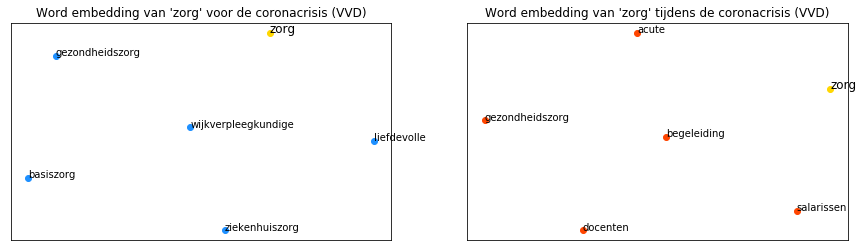

In [12]:
compare('zorg', 'VVD')

Expected words found for model before corona crisis:  3 /3
Expected words found for model during corona crisis:  2 /3


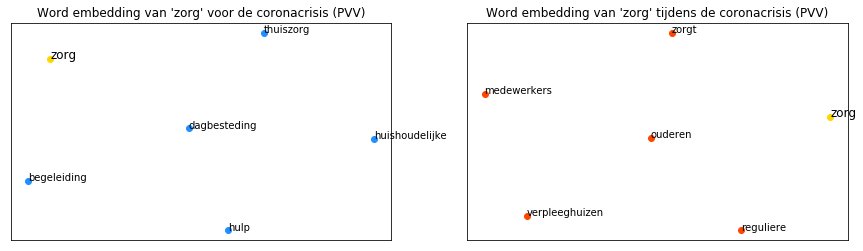

In [13]:
compare('zorg', 'PVV')

Expected words found for model before corona crisis:  3 /3
Expected words found for model during corona crisis:  3 /3


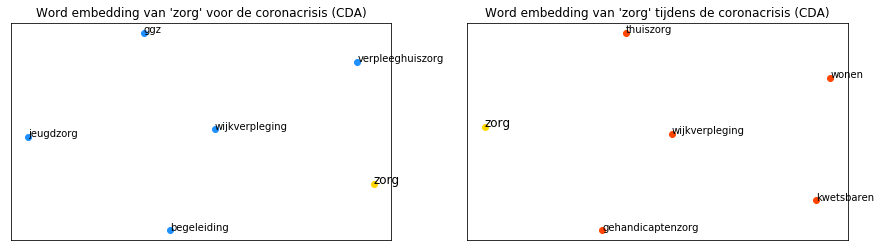

In [14]:
compare('zorg', 'CDA')

Expected words found for model before corona crisis:  3 /3
Expected words found for model during corona crisis:  3 /3


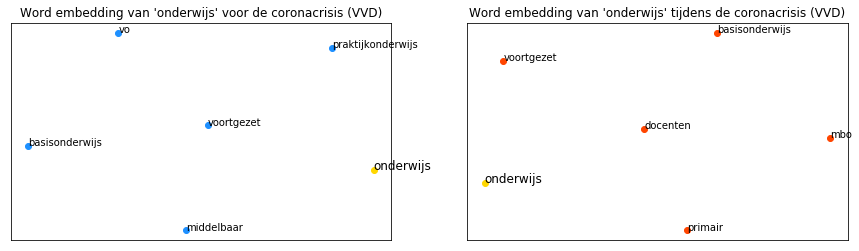

In [15]:
compare('onderwijs', 'VVD')

Expected words found for model before corona crisis:  3 /3
Expected words found for model during corona crisis:  2 /3


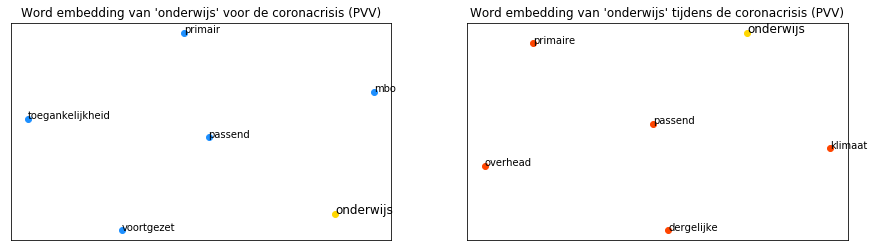

In [16]:
compare('onderwijs', 'PVV')

Expected words found for model before corona crisis:  3 /3
Expected words found for model during corona crisis:  3 /3


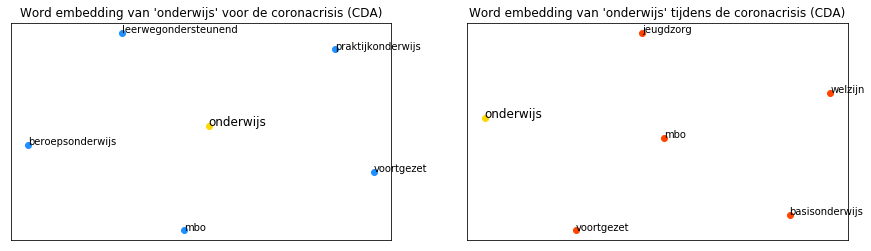

In [17]:
compare('onderwijs', 'CDA')

### 5.3.2. Interpretation <a id=section5.3.2></a>

As is shown by the plots, the examined parties have changed the way they talk about health care during the corona crisis. Words like ‘salarissen’ (salaries), ‘ouderen’ (elderly), and ‘gehandicaptenzorg’ (disabled care) can be seen in the word embeddings during the corona crisis, but not before. Notably, distinct word embeddings can be seen for each party. ‘Salarissen’ is a part of the word embedding of health care for the VVD, but not for the PVV and CDA. Similarly, the PVV and CDA have words relating to the elderly and disabled people in their word embeddings, whereas the VVD does not. This shows that these parties talk about the issue of health care during the corona crisis differently. They might frame the issue differently or the differences might be a product of differences in priorities concerning the issue.

The results are not as telling for the word embeddings of education. The words in these plots mainly refer to different types of education, such as ‘mbo’ (secondary vocational education), ‘voortgezet’ (secondary), and ‘basisonderwijs’ (primary education). For the most part, this has not changed during the corona crisis.

### 5.3.3. Evaluation <a id=section5.3.3></a>

As English is generally the leading language when it comes to natural language processing research, not many language models for Dutch have been developed. This makes it difficult to evaluate the performance of this model. To be able to systematically evaluate the model to some extent, a new intrinsic evaluation technique was created. Ten native Dutch speakers between the ages of 20-58 were asked to state the word they most associated with three often used words in the Dutch House of Representatives: 'ja' (yes), 'tweede' (second), and 'premier' (Prime Minister). Their associated word could be a synonym, an antonym, an addition, or otherwise related word and they were told to focus on the word, instead of the meaning of the word. The most often mentioned word for 'ja' was 'nee' (no), for 'tweede' 'eerste' (first), and for 'premier', it was 'Minister-President' (synonym of Prime Minister). These most associated words can be expected to be in the top three most similar words to their corresponding given word, according to the model. This was tested and the results of these evaluations can be seen for each of the results above.

Following this evaluation technique, it can be concluded that the models perform well. The expected words can almost always be found in the top three most similar words. The model that performs worst handles data from the PVV during the corona crisis. Its lower performance score might be explainable by a lack of data.

It must also be noted that although this evaluation technique follows previously applied techniques (Socher, 2016), it is a self-developed technique that has not been tested extensively. It could be significantly improved by collecting more data from more participants to determine expected word associations or by checking a larger amount of expected word associations.

### 5.3.4. Discussion <a id=section5.3.4></a>

Firstly, it is important to note that the Word2Vec technique uses randomization internally. This means that the results of this technique will not always be the same. This can also be observed in this research’s results. Although the generated word embeddings are generally consistent, the results do sometimes differ. A larger dataset can help in constructing more consistent results.

Secondly, the interpretation of the results can be much more extensive and meaningful if they were combined with a solid background of the scientific fields to which it has implications: the political and social sciences. If reliable and well-founded conclusions about political parties can be drawn from these results, they might provide a more useful tool to voters. 

## 5.4 Conclusion <a id=section5.4></a>

### 5.4.1. Summary <a id=section5.4.1></a>

The research question for this subsection was: “How has the way political parties talk about major political issues changed during the corona crisis?”

To answer this question, word embeddings for the political issues ‘zorg’ (health care) and ‘onderwijs’ (education) from before and during the corona crisis were examined for the parties VVD, PVV, and CDA. From these word embeddings, it became clear that the way parties talk about health care has changed during the corona crisis, whereas the way they talk about education has not changed much. Salaries, the elderly, and disabled people became more present in the word embeddings of health care.

### 5.4.2. Lessons learned <a id=section5.4.2></a>

This subsection shows that NLP, and specifically word embeddings, can be used to create tools that can increase one’s political knowledge. It also shows, however, that for these techniques to truly contribute to the political science field, consistent results must be generated, and thus, large datasets need to be used. To ascribe meaning to the results, collaboration between different fields of science is needed.

### 5.4.3. Directions for future work <a id=section5.4.3></a>

Within the field of computer science, much can be improved by using techniques such as subsampling to decrease the training time or negative sampling to more accurately train the Word2Vec model for frequent words. Simply having a bigger dataset will definitely improve the results from during the corona crisis, as the dataset for this period is smaller than for the period before the corona crisis. This is, however, not a viable option when one wants to use the Word2Vec technique to inform voters, for example, on the effects of recent events, as the dataset after a recent event will always be relatively small. 

There are also opportunities for future work within political science and psychology. It would be interesting to see if the model matches findings from political science techniques and if a model like the one outlined in this subsection can truly help to increase political understanding among voters by testing its real-life effects.

# 6. RQ4: Dutch Parties about Refugees <a id=RQ4></a>

## 6.1. Introduction research question

### 6.1.1 Motivation
With the upcoming elections in mind on the 17th of March 2021, the Dutch politicians are spreading their opinion on big topics such as education, the economy, and migration. All big topics and the parties’ opinions on them are covered in the election programs, which the parties release for upcoming elections. One of the big topics, migration, is what this research question is all about. With the fourth question __“Which political parties do talk positive or negative about accepting refugees, based on pattern.nl sentiment analysis?”__, the goal is to show if political parties really do talk positive or negative throughout the past years about accepting refugees as they say they will do in their election program. Most parties on the left are in favour of accepting refugees, and most parties on the right are in favour of accepting fewer refugees (www.kieskompas.nl). But do they also talk in the House of Representatives positive or negative about accepting refugees, as they say so in their party program?

## 6.2. Experimental Setup

### 6.2.1 Dataset and Preprocessing

#### 6.2.1.1. Note on Data and Biases
The data used in this research contains the parliamentary debates from April 2014 till November 2020, with sentences that contain one of the keywords. This is a subset of the initial dataset. The subset focuses only on keywords that are related to the word refugee. Since this question aims to detect political ideology through sentiment analysis of refugee-related topics. The dataset contains .xml files in which information such as the date, the location, the speaker, the party to which the speaker is affiliated, and the transcripted text, denoting what the speaker has said, along with other information are available in these files. So initially the data used is a subset of the dataset from the ParlaMint project, described in the overall data section of this notebook.

#### 6.2.1.2. Preliminaries
The implementation presented in this research relies on the pattern nlp tools and libraries, nltk nlp tools, and libraries and Elementree tools, furthermore, the regex tool is used to edit text and pandas will be used to work with data frames, last of all the matplotlib.pyplot IPython and seaborn libraries are being used to plot the results into graphs. You can get all of these by running the following code in your terminal:
```sh
pip install pattern
pip install pandas
pip install matplotlib
pip install IPython
```
By importing the libraries as follows the code can be implemented correctly. When running pattern on a MacBook device, there could be problems with installing. If the Python3 does not work, the code could be running in a p36workshop environment. When installing this, work from a -bash terminal.

```sh
conda create -n p36workshop python=3.6 ipykernel jupyter anaconda
conda activate p36workshop
python kernel install --name p36workshop —user
conda config --add channels conda-forge
conda install pattern 
```
    
When installed, open Anaconda-Navigator and go to environments, select p36workshop and open a jupyter notebook. Now, when importing sentiment, from pattern.nl there must be no error anymore.

### 6.2.2. Approach
The approach that will be used to find an answer to the research question, is first to collect a set of keywords about refugees. This set of keywords is bases on synonyms from the word refugee and will be checked with counting words in the dataset. When this set of keywords is collected the keywords will help to make a smaller dataset, with only the sentences about refugees in it. The set of sentences is collected in a smaller dataset, so the third and last step can proceed. In the last step, the smaller dataset with the sentences which contain one of the keywords will be analysed with the sentiment package of pattern.nl. When analysing the smaller dataset, the sentiment score will be linked back to the party who said it and will be plotted. So to display the approach short:

* Find keywords 
* Collect the sentences with a keyword in it and make a smaller dataset
* Analyse sentences with pattern.nl package sentiment and link back to party who said it  

### 6.2.3. Implementation details
The first step is collecting the keywords which are linked to the topic refugees. These keywords are found on www.synoniemen.net and www.rijksoverheid.nl. From these sites came clear that ‘vluchteling’, ‘asielzoeker’ and ‘immigrant’ are the top 3 most used Dutch words when people speak about refugees. With this information, the list keywords is created. The next piece of code scans all the 5189 documents in the dataset for the keywords and checks if these words really occur often in the provided dataset.

In [33]:
def word_counter(word):
    counter = 0
    word_count = {}
    directory = os.listdir('full_dataset_output_second_pass_16_01')
    for filename in sorted(directory):
        filepath = os.path.join('full_dataset_output_second_pass_16_01', filename)
        with open(filepath, 'r') as fp:
            for line in fp:
                line = line.lower()
                counter += line.count(word)
    print("Number of times the word {} appears in the dataset: {}".format(word, counter))

keywords = ['vluchtelingen', 'vluchteling', 'immigranten', 'immigrant', 'asielzoekers', 'asielzoeker']


for i in keywords:
    word_counter(i)

Number of times the word vluchtelingen appears in the dataset: 7124
Number of times the word vluchteling appears in the dataset: 7547
Number of times the word immigranten appears in the dataset: 326
Number of times the word immigrant appears in the dataset: 344
Number of times the word asielzoekers appears in the dataset: 3725
Number of times the word asielzoeker appears in the dataset: 4258


The code below is the same as above, but makes a plot.

In [34]:
directory = os.listdir('full_dataset_output_second_pass_16_01')
count_vluchteling = 0
count_vluchtelingen = 0
count_immigrant = 0
count_immigranten = 0
count_asielzoeker = 0
count_asielzoekers = 0
for filename in sorted(directory):
    filepath = os.path.join('full_dataset_output_second_pass_16_01', filename)
    with open(filepath, 'r') as fp:
        for line in fp:
            line = line.lower()
            #String to search for:
            count_vluchteling += line.count('vluchteling')
            count_vluchtelingen += line.count('vluchtelingen')
            count_immigrant += line.count('immigrant')
            count_immigranten += line.count('immigranten')
            count_asielzoeker += line.count('asielzoeker')
            count_asielzoekers += line.count('asielzoekers')

totaal_vlucht = count_vluchteling + count_vluchtelingen
totaal_immi = count_immigrant + count_immigranten
totaal_asiel = count_asielzoeker + count_asielzoekers

print("vluchteling:", count_vluchteling)
print("vluchtelingen:", count_vluchtelingen)
print("Number of times the word vluchteling(en) appears in the dataset:", totaal_vlucht)
print("immigrant:", count_immigrant)
print("immigranten:", count_immigranten)
print("Number of times the word immigrant(en) appears in the dataset:", totaal_immi)
print("asielzoeker:", count_asielzoeker)
print("asielzoekers:", count_asielzoekers)
print("Number of times the word asielzoeker(s) appears in the dataset:", totaal_asiel)

vluchteling: 7547
vluchtelingen: 7124
Number of times the word vluchteling(en) appears in the dataset: 14671
immigrant: 344
immigranten: 326
Number of times the word immigrant(en) appears in the dataset: 670
asielzoeker: 4258
asielzoekers: 3725
Number of times the word asielzoeker(s) appears in the dataset: 7983


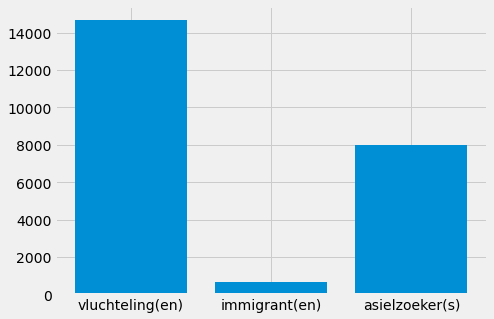

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['vluchteling(en)', 'immigrant(en)', 'asielzoeker(s)']
students = [totaal_vlucht, totaal_immi, totaal_asiel]
ax.bar(langs,students)
plt.show()

The keywords are decided and count, now let's see in which years refugees where the highest priority for the Dutch politicians.

In [36]:
c_v_2014 = c_i_2014 = c_a_2014 = 0
c_v_2015 = c_i_2015 = c_a_2015 = 0
c_v_2016 = c_i_2016 = c_a_2016 = 0
c_v_2017 = c_i_2017 = c_a_2017 = 0
c_v_2018 = c_i_2018 = c_a_2018 = 0
c_v_2019 = c_i_2019 = c_a_2019 = 0
c_v_2020 = c_i_2020 = c_a_2020 = 0
l_2014 = ["2014"]
l_2015 = ["2015"]
l_2016 = ["2016"]
l_2017 = ["2017"]
l_2018 = ["2018"]
l_2019 = ["2019"]
l_2020 = ["2020"]
totaal_v = []
totaal_i = []
totaal_a = []
for filename in sorted(directory):
    filepath = os.path.join('full_dataset_output_second_pass_16_01', filename)
    for i in l_2014:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2014 += line.count('vluchteling')
                    c_v_2014 += line.count('vluchtelingen')
                    c_v_2014 += line.count('Vluchteling')
                    c_i_2014 += line.count('immigrant')
                    c_i_2014 += line.count('Immigrant')
                    c_i_2014 += line.count('immigranten')
                    c_a_2014 += line.count('asielzoeker')
                    c_a_2014 += line.count('Asielzoeker')
                    c_a_2014 += line.count('asielzoekers')
    for i in l_2015:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2015 += line.count('vluchteling')
                    c_v_2015 += line.count('vluchtelingen')
                    c_v_2015 += line.count('Vluchteling')
                    c_i_2015 += line.count('immigrant')
                    c_i_2015 += line.count('Immigrant')
                    c_i_2015 += line.count('immigranten')
                    c_a_2015 += line.count('asielzoeker')
                    c_a_2015 += line.count('Asielzoeker')
                    c_a_2015 += line.count('asielzoekers')
    for i in l_2016:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2016 += line.count('vluchteling')
                    c_v_2016 += line.count('vluchtelingen')
                    c_v_2016 += line.count('Vluchteling')
                    c_i_2016 += line.count('immigrant')
                    c_i_2016 += line.count('Immigrant')
                    c_i_2016 += line.count('immigranten')
                    c_a_2016 += line.count('asielzoeker')
                    c_a_2016 += line.count('Asielzoeker')
                    c_a_2016 += line.count('asielzoekers')
    for i in l_2017:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2017 += line.count('vluchteling')
                    c_v_2017 += line.count('vluchtelingen')
                    c_v_2017 += line.count('Vluchteling')
                    c_i_2017 += line.count('immigrant')
                    c_i_2017 += line.count('Immigrant')
                    c_i_2017 += line.count('immigranten')
                    c_a_2017 += line.count('asielzoeker')
                    c_a_2017 += line.count('Asielzoeker')
                    c_a_2017 += line.count('asielzoekers')
    for i in l_2018:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2018 += line.count('vluchteling')
                    c_v_2018 += line.count('vluchtelingen')
                    c_v_2018 += line.count('Vluchteling')
                    c_i_2018 += line.count('immigrant')
                    c_i_2018 += line.count('Immigrant')
                    c_i_2018 += line.count('immigranten')
                    c_a_2018 += line.count('asielzoeker')
                    c_a_2018 += line.count('Asielzoeker')
                    c_a_2018 += line.count('asielzoekers')
    for i in l_2019:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2019 += line.count('vluchteling')
                    c_v_2019 += line.count('vluchtelingen')
                    c_v_2019 += line.count('Vluchteling')
                    c_i_2019 += line.count('immigrant')
                    c_i_2019 += line.count('Immigrant')
                    c_i_2019 += line.count('immigranten')
                    c_a_2019 += line.count('asielzoeker')
                    c_a_2019 += line.count('Asielzoeker')
                    c_a_2019 += line.count('asielzoekers')
    for i in l_2020:
        if i in filename:
            with open(filepath, 'r') as fp:
                for line in fp:
                    c_v_2020 += line.count('vluchteling')
                    c_v_2020 += line.count('vluchtelingen')
                    c_v_2020 += line.count('Vluchteling')
                    c_i_2020 += line.count('immigrant')
                    c_i_2020 += line.count('Immigrant')
                    c_i_2020 += line.count('immigranten')
                    c_a_2020 += line.count('asielzoeker')
                    c_a_2020 += line.count('Asielzoeker')
                    c_a_2020 += line.count('asielzoekers')
totaal_v.append(c_v_2014)
totaal_i.append(c_i_2014)
totaal_a.append(c_a_2014)
totaal_v.append(c_v_2015)
totaal_i.append(c_i_2015)
totaal_a.append(c_a_2015)
totaal_v.append(c_v_2016)
totaal_i.append(c_i_2016)
totaal_a.append(c_a_2016)
totaal_v.append(c_v_2017)
totaal_i.append(c_i_2017)
totaal_a.append(c_a_2017)
totaal_v.append(c_v_2018)
totaal_i.append(c_i_2018)
totaal_a.append(c_a_2018)
totaal_v.append(c_v_2019)
totaal_i.append(c_i_2019)
totaal_a.append(c_a_2019)
totaal_v.append(c_v_2020)
totaal_i.append(c_i_2020)
totaal_a.append(c_a_2020)
print(totaal_v, totaal_i, totaal_a)

[0, 5477, 4093, 1393, 1544, 925, 588] [0, 130, 72, 88, 189, 93, 95] [28, 3197, 1711, 950, 563, 925, 536]


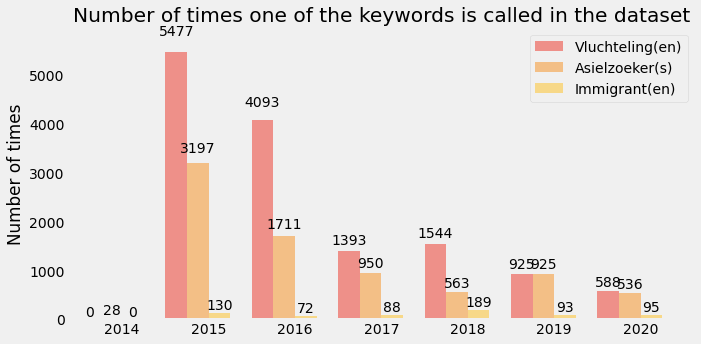

In [37]:
labels = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
pos = list(range(len(totaal_v))) 
width = 0.25 
fig, ax = plt.subplots(figsize=(10,5))

bar_1 = plt.bar(pos, totaal_v, width, alpha=0.5, color='#EE3224', label="Vluchtelingen") 
bar_2 = plt.bar([p + width for p in pos], totaal_a, width, alpha=0.5, color='#F78F1E', label="Asielzoekers") 
bar_3 = plt.bar([p + width*2 for p in pos], totaal_i, width, alpha=0.5, color='#FFC222', label="Immigranten") 

ax.set_ylabel('Number of times')


ax.set_title('Number of times one of the keywords is called in the dataset')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(totaal_v + totaal_a + totaal_i) + 500] )

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


autolabel(bar_1)
autolabel(bar_2)
autolabel(bar_3)

# Adding the legend and showing the plot
plt.legend(['Vluchteling(en)', 'Asielzoeker(s)', 'Immigrant(en)'], loc='upper right')
plt.grid()
plt.show()

In [38]:
partijen.remove(None)
partijen.remove('Chair')
partijen.remove('OSF')
partijen.remove('Van Vliet')
partijen.remove('Groep Bontes/Van Klaveren')
partijen.remove('Houwers')
partijen.remove('Klein')
partijen.remove('Griffier')
partijen.remove('EP/VVD')
partijen.remove('EP/PvdA')
partijen.remove('EP/SP')
partijen.remove('EP/CDA')
partijen.remove('EP/D66')
partijen.remove('EP/GroenLinks')
partijen.remove('EP/CU/SGP')
partijen.remove('EP/PvdD')
partijen.remove('vanPareren')
print(partijen)

['VVD', 'SP', 'PvdA', 'CDA', 'PvdD', 'PVV', 'GroenLinks', 'SGP', 'D66', 'ChristenUnie', '50PLUS', 'DENK', 'FvD']


## 6.3. Evaluation

### 6.3.1. Metrics 

For this research, the main part of the evaluation in metrics is located in the sentiment analysis from the pattern.nl package. The sentiment analysis from the pattern.nl library has a total of 6887 unique words annotated to be most descriptive about the utterances being made in the Dutch parliament. The evaluation of this tool is done by the University of Twente using MAE or Mean Average Error. The scores they found were between a score of 0.501 and 0.607.

### 6.3.2. Results 
The results will consist of a table containing all the average sentiment keywords, the standard deviation sentiment of the keywords, N keyword, the average sentiment of the party, the standard deviation sentiment per party, and how many times the party says something in general. The overall results for the sentiment analysis on the keywords will be presented in a plot, based on the sentiment analysis and the standard deviation per party about the keywords. 
This is done to visualize and find the differences in sentiment for all utterances and the, based on relation to refugee, selected utterances. 

When evaluating the results, the main differences are determined by the average sentiment scores for keywords about refugees and the standard deviation. The comparison between parties is made based on the average scores from all refugee-related topics. The standard deviation is used to assess if any major differences were found for each party and if any party differs significantly from all others.

## 6.4. Findings

### 6.4.1. Illustration
When the sentences which contain the keywords are extracted, the sentiment score with pattern.nl could be calculated and plotted. The bar graph contains all the parties with enough data and shows the average sentiment per party. The black lines are the standard deviation bases on the sentiment score per party. In this section, the sentiment when focussing on keywords, for each party during the period of April 2014 to November 2020, is shown. The bar with no specified party belongs to the None section, which represents the statements released by no further specified party.

In [43]:
#'immigranten', 'immigrant', 'asielzoekers', 'asielzoeker', 'vluchtelingen', 'vluchteling'
keywords = ['immigranten', 'immigrant', 'asielzoekers', 'asielzoeker', 'vluchtelingen', 'vluchteling']
print('\nNumber of keywords:', len(keywords),"\n")

# setting up empty lists for the x and y data
scores = []

for partij in partijen:
    # setting counters
    count1 = 0
    count2 = 0

    if partij in teksten['#covid']:
        # setting up empty lists for scores
        score1 = []
        score2 = []

        for tekst in teksten['#covid'][partij]:

            # ignoring none-types or other datatypes
            if isinstance(tekst, str):
                words = tekst.split()

                for word in words:
                    # removing punctuation
                    re.sub('[,\.!?]', '', word)
                    # setting words to lowercase
                    word.lower()

            # overall sentiment
            score2.append(sentiment(tekst))
            count2 += 1

            # focussing on keywords about covid-19
            check = any(item in words for item in keywords)

            if check == True:
                score1.append(sentiment(tekst))
                # checking number of tekst with keywords
                count1 += 1

        # checking per party
        scores.append([partij, np.mean(score1), np.std(score1), count1, np.mean(score2), np.std(score2), count2])


Number of keywords: 6 



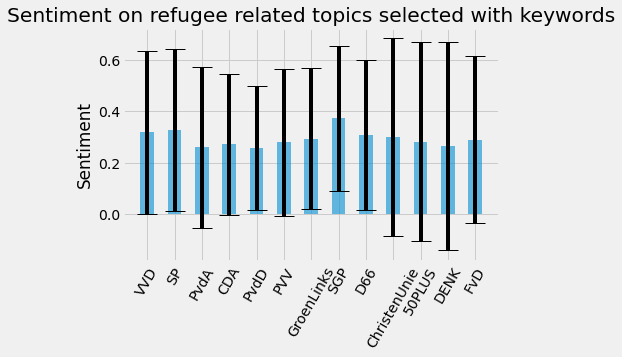

In [78]:
# prep for plot
parties = [row[0] for row in scores]
x = np.arange(len(partijen))
y1 = [row[1] for row in scores]

#plot of results of keyword related text
fig, ax = plt.subplots()
ax.bar(x, [row[1] for row in scores],
       yerr=[row[2] for row in scores],
       width=0.5,
       align='center',
       alpha=0.6,
       ecolor='black',
       capsize=10)

ax.set_ylabel('Sentiment')
ax.set_xticks(x)
ax.set_xticklabels(partijen, rotation=60)
ax.set_title('Sentiment on refugee related topics selected with keywords')
ax.yaxis.grid(True)

In [73]:
df_sent = pd.DataFrame(scores, columns=['Party', 'Average sentiment keywords','Stdev sentiment keywords', 'N keywords','Average sentiment', 'Stddev sentiment', 'N'])

print('The maxima and minima from the results:')
print('The party with the maximum sentiment score on corona related topics selected with keywords was:', parties[y1.index(max(y1))],', with a score of: %.2f' % max(y1))
print('The party with the minimum sentiment score on corona related topics selected with keywords was:', parties[y1.index(min(y1))],', with a score of: %.2f' % min(y1))
df_sent

The maxima and minima from the results:
The party with the maximum sentiment score on corona related topics selected with keywords was: SGP , with a score of: 0.37
The party with the minimum sentiment score on corona related topics selected with keywords was: PvdD , with a score of: 0.26


,Party,Average sentiment keywords,Stdev sentiment keywords,N keywords,Average sentiment,Stddev sentiment,N
0,VVD,0.317616,0.318733,46,0.284183,0.296492,21285
1,SP,0.326922,0.316272,18,0.277280,0.303134,8717
2,PvdA,0.259231,0.314068,15,0.281228,0.301531,6492
3,CDA,0.271801,0.274848,16,0.285219,0.295224,19135
4,PvdD,0.255368,0.241425,6,0.261428,0.309773,4221
5,PVV,0.278307,0.286301,80,0.258629,0.315077,6957
6,GroenLinks,0.292825,0.275542,57,0.289925,0.301037,8393
7,SGP,0.371806,0.282933,10,0.288033,0.305365,3391
8,D66,0.306316,0.291727,46,0.290274,0.295201,15938
9,ChristenUnie,0.299185,0.384942,18,0.295999,0.296423,7579


### 6.4.2. Interpretations
In the results that can be seen in the data frame above, the 'party' column represents the party that released the statement, the 'average sentiment on keywords' column represents the average sentiment on all texts in which a word from the keywords wordlist was mentioned, the 'Stdev sentiment keywords' column represents the standard deviation of the sentiment of the texts in which a word from the keywords word list was mentioned, the 'N keywords' column represents the number of times a any of the words from the keywords word list were mentioned in the texts, the 'average sentiment' column represents the overall average sentiment on all texts, the 'Stdev sentiment' column represents the standard deviation of the overall sentiment of the texts. The 'N' column represents the number of times any of the parties in the parties list were mentioned in the texts. In the graph, this data is further represented for visualization.

### 6.4.3. Discussion
First of all, for this research question, a package from pattern.nl called sentiment was installed. This package includes a lot of words to analyse Dutch words, but not all words are included. In this way, results could be incomplete, because words could have been not analysed correctly. 

Second, a wordlist containing keywords about refugees was used for this research question. While this wordlist is based on word count in the database, it could be that some words which refer to refugees are missed. It could be that parties that talk negatively about accepting refugees use other words to define them. These words might not be included in this research, so statements about refugees could have been missed. This is also a point for future work. 

Third, some small parties are included in the dataset, but to make a working sentiment analysis there must be more data provided. These parties have been left out of the analysis but could have been valuable. In the future, parties that are currently new and small will probably have existed longer, so there will be more data available. This is also a point for future work when more data about small parties will be available. 

Lastly, since we deal with a large amount of data spread over a large amount of time, we need to be aware that the possible correlations found may be the result of confounding variables. To avoid this we need to consider previous related research, to be more aware of the mistakes that can be made.

## 6.5. Conclusions

### 6.5.1. Summary
There can not be concluded significant differences in the results there are obtained from this research. As the lowest score, when talking about all the keywords, 0.255 (PvdD) came out. As the highest score when talking about all the keywords, 0.37 (SGP) came out. As the lowest score, when talking about the keyword "vluchteling(en)", 0.251 (DENK) came out. As the highest score when talking about all the keywords "vluchteling(en)", 0.57 (SGP) came out. As the lowest score, when talking about the keyword "asielzoeker(s)", 0.18 (PvdD) came out. As the highest score when talking about all the keywords "asielzoeker(s)", 0.34 (SP) came out. As the lowest score, when talking about the keyword "immigrant(en)", 0.13 (VVD) came out. As the highest score when talking about all the keywords "immigrant(en)", 0.45 (CDA) came out. 

These numbers are quite remarkable because when talking about the keywords PvdD came out with the lowest sentiment score. When reflecting this to the party program of the PvdD, the PvdD is very positive about accepting refugees (www.vluchtelingenwerk.nl). And also looking at this same source, and party program at the SGP is not very tolerant of accepting refugees, while the sentiment analysis suggested that they will be the most positive party. 

When looking at only the keyword "immigrant(en)" the VVD came out as the most negative. When comparing this to the party program and www.vluchtelingenwerk.nl, this is quite an accurate sentiment analysis, as the VVD is not in favour of accepting refugees. Nevertheless, CDA came out as most positive, while CDA is neutral when talking about accepting refugees (www.vluchtelingenwerk.nl). This could be because "immigrant(en)" was the keyword that occurred the least often in the dataset from all the keywords that are used.

### 6.5.2. Directions future work
Since we know for a fact that most political parties have different ideologies, we can furthermore conclude that the results from sentiment analysis might not directly refer to the political ideologies. Nevertheless, we can also see that the standard deviations in the results are almost equal to the average score meaning that the parties could in fact have similar ideologies but when in a debate, take on different stances on the topics to oppose the other parties on certain topics. Nevertheless to prove this theory more research is needed. A suggestion for such research is to focus more on a certain topic and compare only debates between two opposing parties. If their average sentiment on the topic would still be very similar, then this theory might be proven.
However, since more research is needed to prove this, other scenarios must be discussed also. One of those scenarios is the analysis of non-related text, this concerns the sentiment analysis itself. While analyzing the texts, the sentiment of the entire text (statement) was taken. This could cause the sentiment to be evened out by the abundance of text, which might not directly concern the topic. Therefore a suggestion would be to focus on sentences in which the topic is addressed, instead of focussing on the entire statement in which words related to the topic are mentioned.

Another suggestion was received later from a Ph.D. student at the IRLab Ruben van Heusden. For future research, it is interesting to look at what words are actually used to describe refugees. He suggested that parties who have a negative stance towards refugees might use words like 'aliens' or 'illegal immigrants, whereas other parties might use different words, in which case the occurrences of those words itself might already be an indication of the sentiment of a party towards the topic. This is highly interesting and a great suggestion for future work.

### 6.5.3. Lessons learned
We can learn from this research that specific selection of topics and a good selection of data that will be reviewed for the sentiment scores are needed to get better results. Furthermore, the use of pattern for a mac OS is much more difficult than for a Linux OS to do it correctly the user needs to install the package through conda, using a specific channel.

# 7. Overall conclusion<a class='anchor' id='CONC'></a>

## 7.1. Summary

Based on the results of research question one - all corona-related topics and the results for specific topics - only the results for one of the topics, namely 'horeca', showed a large enough difference between all parties. This difference, however, is only due to a large outlier in this set. When removing this outlier, once again, no significant difference is found. This would suggest that no significant difference in political ideology was found based on the sentiment of Dutch parliament parties on Covid-19 related topics through the sentiment analysis of political debates.

Secondly, in the result of research question two, we find that the sentiment analysis being used provides an accurate display of how humans would interpret an utterance compared to python NLP analysis. This sentiment analysis and transformation of the data using a rolling window gives stability to the data and successfully annotates the sentiment. Finding the topic behind the positive or negative sentiment with LDA shows us that the rolling window generalizes the utterances too much and causes the topics to have many of the same keywords. The rolling window is successful in showing overall sentiment between parties and filtering noise but makes it harder to connect to specific topics. Using rule-based topic analysis, the notebook still shows clear results based on percentages within the utterances. This implementation could be of better use when analysing a small number of topics with a lot of utterances.

Thirdly, the results for research question three show that Word2Vec is a potentially useful tool in the field of political communication. When comparing the period before the corona crisis and during the corona crisis, clear changes in how parties talk about the topic of health care can be seen. Moreover, differences can be seen across parties. The VVD talks more about salaries in the context of health care during the corona crisis, the PVV more about the elderly, and the CDA more about care for disabled people. Such clear differences could not be seen within the context of education. These results, combined with well-founded political knowledge, might help potential voters in determining their voting preferences and understanding the political playing field better.

Lastly, we can conclude from research question four that that there are no significant differences in the results we obtained from this research. The SGP had the highest overall sentiment score based on the refugee keywords, and the PvdD had the lowest overall sentiment score. This is notable because when looking at the party program from the SGP and PdvD, the parties are the opposite of what came out of the sentiment analysis. PdvD is in favour of accepting refugees, while SGP is not. 

Our eventual goal was to turn diverse parliamentary data into interpretable resources. In this research, the data was indeed converted into more interpretable resources but too few significant results were found to conclude that our goal has been reached. Nevertheless, the first steps have been set and if further research focuses on optimizing these methods, this goal could surely be reached.

## 7.2. Discussion of the different approaches

First of all, research questions one and four are very similar. The implementations and approaches used to answer research question one could have also been applied to the dataset used in research question four, except for the implementation of the sentiment analysis for corona-related topics, since nothing has been said about this in the period before Covid-19. Also, the 'vluchtelingen' sentiment analysis could provide further analysis of a different topic during the Covid-19 period.

Furthermore, if some changes are made in the research topic, the implementation of research questions two and three can be applied to the dataset of both research questions one and four. Since the topic can't be about the sentiment of parties on other parties from before and after the start of the Covid-19 pandemic, another split in the dataset will have to be made to search for differences. Nevertheless, these methods will still work on the different datasets from research questions one and four.

Lastly, the implementation of the third research question can also be applied to other periods besides the currently reviewed Covid-19 period. We could for example apply it to the dataset used in research question four to examine the changes in each year for the period between 2016 and 2020.


## 7.3. Directions Future work

Since most questions in this research focussed on the Covid-19 period, we could suggest that similar methods, if improved on in certain areas, could also be applied to analyze differences and transform text-based data from different periods into more interpretable data. Nevertheless, as has been discussed in each research question individually, some changes will need to be made. As has been concluded, very few significant results have been found, therefore the approaches, when used for future research, will have to be improved or changed.  

# 8. References <a class='anchor' id='References'></a>

Baumer, E. P., Polletta, F., Pierski, N., & Gay, G. K. (2017). A simple intervention to reduce framing effects in perceptions of global climate change. Environmental Communication, 11(3), 289-310.

Bhatia, S. and P, D. (2018). Topic-specific sentiment analysis can help identify political ideology. In Proceedings of the 9th Workshop on Computational Approaches to Subjectivity, Sentiment and Social Media Analysis, pages 79–84, Brussels, Belgium, October. Association for Computational Linguistics

Biessmann, F. (2016). Automating political bias prediction. arXiv preprint arXiv:1608.02195.

Galston, W. A. (2001). Political knowledge, political engagement, and civic education. Annual review of political science, 4(1), 217-234.

Jacoby, W. G. (2000). Issue framing and public opinion on government spending. American Journal of Political Science, 750-767.

K. Lazaridou, R. Krestel. (2016). Identifying political bias in news articles, Bulletin of the IEEE TCDL 12.

Kanayama, H., Nasukawa, T., & Watanabe, H. (2004). Deeper sentiment analysis using machine translation technology. In COLING 2004: Proceedings of the 20th International Conference on Computational Linguistics (pp. 494-500).

Lubbe, R. (2020, September 5). Deze politieke thema’s vinden kiezers het belangrijkst. Retrieved March 11, 2021, from https://eenvandaag.assets.avrotros.nl/user_upload/PDF/RapportageSpecial.pdf

Mohit Iyyer, Peter Enns, Jordan L. Boyd-Graber, and Philip Resnik. (2014). Political ideology detection using recursive neural networks. In ACL (1), pages 1113–1122. The Association for Computer Linguistics.

Schwarz, Juliana. (2019). Detecting Political Ideology in Youtube Comments using Machine Learning.
Tom De Smedt and Walter Daelemans. (2012). Pattern for python. J. Mach. Learn. Res. 13, null (3/1/2012), 2063–2067.

Song, Y., Pan, S., Liu, S., Zhou, M. X., & Qian, W. (2009, November). Topic and keyword re-ranking for LDA-based topic modeling. In Proceedings of the 18th ACM conference on Information and knowledge management (pp. 1757-1760).

Tom De Smedt and Walter Daelemans. (2012). Pattern for python. J. Mach. Learn. Res. 13, null (3/1/2012), 2063–2067.

Yanchuan Sim, Brice D. L. Acree, Justin H. Gross, and Noah A. Smith. (2013). Measuring ideological proportions in political speeches. In Proceedings of the 2013 Conference on Empirical Methods in Natural Language Processing, pages 91–101. Association for Computational Linguistics.